## SMDM Graded Project (Coded) Rubric

### Problem 1
Context
Analysts are required to explore data and reflect on the insights. Clear writing skill is an integral part of a good report. Note that the explanations must be such that readers with minimum knowledge of analytics is able to grasp the insight.

Austo Motor Company is a leading car manufacturer specializing in SUV, Sedan, and Hatchback models. In its recent board meeting, concerns were raised by the members on the efficiency of the marketing campaign currently being used. The board decides to rope in an analytics professional to improve the existing campaign.

### Objective
They want to analyze the data to get a fair idea about the demand of customers which will help them in enhancing their customer experience. Suppose you are a Data Scientist at the company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.



## Problem 1-1 - Data Overview
- ### Import the libraries - Load the data - Check the structure of the data - Check the types of the data - Check for and treat (if needed) missing values - Check the statistical summary - Check for and treat (if needed) data irregularities - Observations and Insights


### 1-1-a)   Import the libraries 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### 1-1-b) Load the data 

In [2]:
#read the file
df=pd.read_csv("austo_automobile .csv")

### 1-1-c) Check the structure of the data

In [3]:
#check the shape of the data(no.of columns,rows)
print("no.of rows:",df.shape[0],"\nno.of columns:",df.shape[1])

no.of rows: 1581 
no.of columns: 14


The data  contains 1581 rows and 14 columns.

In [4]:
#print first 5 rows
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


### 1-1-d)Check the types of the data 

In [5]:
#check the data types of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.1+ KB


data set have 8 object data types,5 int type,1 float type.
missing values on Gender  and Partner_salary columns.

### 1-1-e) Check for and treat (if needed) missing values

#### check missing values

In [6]:
#check null values in te data frame
df.isnull().sum()

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64


* in the Gender column have 53 missing values,Gender is object data type.
* partner_salary column have 106 missing values,partner_salary  is float data type.


####  * treat missing values








* Gender  is object data type ,this 53  null values so  we can treat null values by mode() of the        gender column.

In [7]:
# treat null values of gender column by mode of column>
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
#after treate check the null values in gender column
df[df.Gender.isnull()]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make


In [8]:
#check null values
df.isnull().sum()

Age                   0
Gender                0
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

 * partner_salary  is float data type ,have 106 null values ,treat null values  by median of partner_salary value.

In [10]:
# replace null values by median of partner_salary 
df.Partner_salary=df.Partner_salary.fillna(df.Partner_salary.median()) 

In [11]:
# after check the null values in the entire data frame 
df.isnull().sum()

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64

after there is no  null values in the data set

### 1-1-f) Check the statistical summary

In [12]:
#create data frame with integer and float data types of df data set
df_num = df.select_dtypes(['float64','int64'])
#create data frame with object data types of df data set
df_cat = df.select_dtypes(['object'])

In [13]:
#describe the object data frame
df_cat.describe()

,Gender,Profession,Marital_status,Education,Personal_loan,House_loan,Partner_working,Make
count,1581,1581,1581,1581,1581,1581,1581,1581
unique,4,2,2,2,2,2,2,3
top,Male,Salaried,Married,Post Graduate,Yes,No,Yes,Sedan
freq,1252,896,1443,985,792,1054,868,702


In [14]:
# describe the numercal data frame
df_num.describe()

,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price
count,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000
mean,31.922201,2.457938,60392.220114,20585.895003,79625.996205,35597.722960
std,8.425978,0.943483,14674.825044,18952.938643,25545.857768,13633.636545
min,22.000000,0.000000,30000.000000,0.000000,30000.000000,18000.000000
25%,25.000000,2.000000,51900.000000,0.000000,60500.000000,25000.000000
50%,29.000000,2.000000,59500.000000,25600.000000,78000.000000,31000.000000
75%,38.000000,3.000000,71800.000000,38000.000000,95900.000000,47000.000000
max,54.000000,4.000000,99300.000000,80500.000000,171000.000000,70000.000000


We can see standard deviation of Price is 13633.636545	 whereas the mean      is 35597.722960. However, the max price is 70000.000000	 and min is            18000.000000.

 ## 1-1-g)Check for and treat (if needed) data irregularities 

In [15]:
#check the duplicated values
h=df.duplicated()
df[h]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make


there is no duplicated values in the data set

In [16]:
#check data irregularities
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


###### speling mistakes on Gender column 

In [17]:
# Gender column have speling mistake in "Female" letter
#check unique values in gender column
df.Gender.unique()

array(['Male', 'Femal', 'Female', 'Femle'], dtype=object)

*  the Gender column have "Femal","Femle" are  wrong data ,we want to replace by "Female"

In [18]:
# "Femal","Femle" replace by "Female"
df["Gender"]=df.Gender.replace("Femal","Female")
df["Gender"]=df.Gender.replace("Femle","Female")
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

Now the gender column have only  Male,Female data

##### change the  integer data type of  salary,  total_salary,  price to float data type


In [19]:
#change the integer data type of salary, total_salary, price to float data type
df['Salary']=df['Salary'].astype(float)
df["Total_salary"]= df['Total_salary'].astype(float)
df['Price']= df['Price'].astype(float)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1581 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   float64
 10  Partner_salary    1581 non-null   float64
 11  Total_salary      1581 non-null   float64
 12  Price             1581 non-null   float64
 13  Make              1581 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 173.1+ KB


## 1-1-g)Observations and Insights

In [21]:
#describe data with all data type 
df.describe(include="all")

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
count,1581.000000,1581,1581,1581,1581,1581.000000,1581,1581,1581,1581.000000,1581.000000,1581.000000,1581.000000,1581
unique,NaN,2,2,2,2,NaN,2,2,2,NaN,NaN,NaN,NaN,3
top,NaN,Male,Salaried,Married,Post Graduate,NaN,Yes,No,Yes,NaN,NaN,NaN,NaN,Sedan
freq,NaN,1252,896,1443,985,NaN,792,1054,868,NaN,NaN,NaN,NaN,702
mean,31.922201,NaN,NaN,NaN,NaN,2.457938,NaN,NaN,NaN,60392.220114,20585.895003,79625.996205,35597.722960,NaN
std,8.425978,NaN,NaN,NaN,NaN,0.943483,NaN,NaN,NaN,14674.825044,18952.938643,25545.857768,13633.636545,NaN
min,22.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,30000.000000,0.000000,30000.000000,18000.000000,NaN
25%,25.000000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,51900.000000,0.000000,60500.000000,25000.000000,NaN
50%,29.000000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,59500.000000,25600.000000,78000.000000,31000.000000,NaN
75%,38.000000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,71800.000000,38000.000000,95900.000000,47000.000000,NaN


#### Insights



* Dataset has 14 columns and 1581 rows
* In the dataset have  4 float variables, 2 integers variables, 8 object variables

* The dataset provided is for  'SUV', 'Sedan', 'Hatchback' cars
* partner salary depends on  the  partner working whether or not
* Total salary depends the salary and partner salary
* No duplicate records.
* No null values.
* most maked car is sedan ,702 sedan total maked.
* most customer are Male	,Salaried	,Married,	Post Graduated,have 4       dependents,their have personal loan,have no house loan,their partner             are working.
* We can see standard deviation of Price is 13633.636545	 whereas the mean      is 35597.722960. However, the max price is 70000.000000	 and min is            18000.000000.

# Problem 1.2 - Univariate Analysis
## Explore all the variables (categorical and numerical) in the data - Check for and treat (if needed) outliers - Observations and Insights

### 1.2.a)-Explore all the variables (categorical and numerical) in the                                                         data 

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1581 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   float64
 10  Partner_salary    1581 non-null   float64
 11  Total_salary      1581 non-null   float64
 12  Price             1581 non-null   float64
 13  Make              1581 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 173.1+ KB


###  Histogram  for every  categorical variables

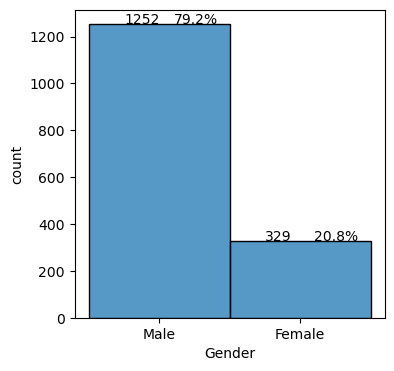

In [23]:
# univariate analysis for Gender column
plt.figure(figsize=(4,4))
ax=sns.histplot(df["Gender"])
plt.xlabel("Gender")
plt.ylabel("count")
# code for percentage ,count label above the each bar
for p in ax.patches:
    ax.annotate("{:.0f}".format(p.get_height()),(p.get_x()+0.25,p.get_height()+0.8))
    ax.annotate(f'{p.get_height()/df["Gender"].count()*100:.1f}%', (p.get_x()+0.6, p.get_height()+0.8))
plt.show()

*most customers are Male,
 20.8%  customer are Female.

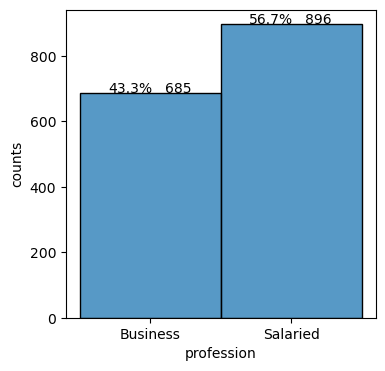

In [24]:
#univariate analysis of  Profession of column
plt.figure(figsize=(4,4))
ax=sns.histplot(data=df,x="Profession")
plt.xlabel("profession")
plt.ylabel("counts")
for p in ax.patches:
    ax.annotate(f"{p.get_height()/df.Profession.count()*100:.1f}%",(p.get_x()+0.2,p.get_height()+0.8))
    ax.annotate("{:.0f}".format(p.get_height()),(p.get_x()+0.6,p.get_height()+0.8))

*56.7% of customers are salaried,43.3% customers are in Business.

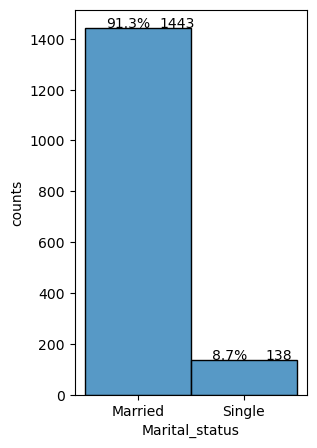

In [25]:
#analysis of  Marital status of column
plt.figure(figsize=(3,5))
ax=sns.histplot(data=df,x="Marital_status")
plt.xlabel("Marital_status")
plt.ylabel("counts")
for p in ax.patches:
    ax.annotate(f"{p.get_height()/df.Profession.count()*100:.1f}%",(p.get_x()+0.2,p.get_height()+0.8))
    ax.annotate("{:.0f}".format(p.get_height()),(p.get_x()+0.7,p.get_height()+0.8))

*91.3% of customers are married

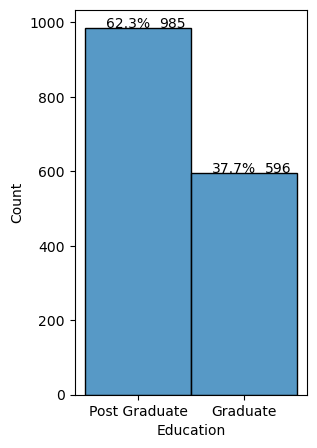

In [26]:
# analysis of Education    column
plt.figure(figsize=(3,5))
ax=sns.histplot(data=df,x="Education")
plt.xlabel("Education")
for p in ax.patches:
    ax.annotate(f"{p.get_height()/df.Profession.count()*100:.1f}%",(p.get_x()+0.2,p.get_height()+0.001))
    ax.annotate("{:.0f}".format(p.get_height()),(p.get_x()+0.7,p.get_height()+0.01))

62.3% of customers are post Graduated

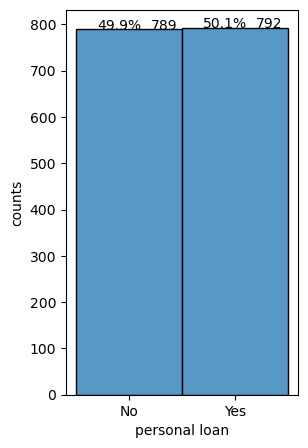

In [27]:
# analysis of   Personal_loan  column
plt.figure(figsize=(3,5))
ax=sns.histplot(data=df,x="Personal_loan")
plt.xlabel("personal loan")
plt.ylabel("counts")
for p in ax.patches:
    ax.annotate(f"{p.get_height()/df.Profession.count()*100:.1f}%",(p.get_x()+0.2,p.get_height()+0.3))
    ax.annotate("{:.0f}".format(p.get_height()),(p.get_x()+0.7,p.get_height()+0.01))

most similar customers have or not personal loans.

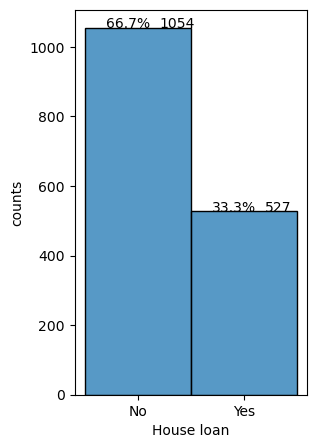

In [28]:
# analysis of   House_loan  column
plt.figure(figsize=(3,5))
ax=sns.histplot(data=df,x="House_loan")
plt.xlabel("House loan")
plt.ylabel("counts")
for p in ax.patches:
    ax.annotate(f"{p.get_height()/df.Profession.count()*100:.1f}%",(p.get_x()+0.2,p.get_height()+0.01))
    ax.annotate("{:.0f}".format(p.get_height()),(p.get_x()+0.7,p.get_height()+0.03))

33.3% customers have House loan.

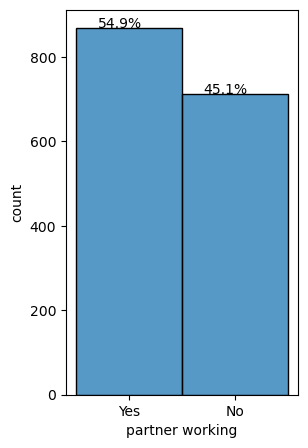

In [29]:
# univariate analysis of  patner working column
plt.figure(figsize=(3,5))
ax=sns.histplot(data=df,x="Partner_working")
plt.xlabel("partner working")
plt.ylabel("count")
for p in ax.patches:
    ax.annotate(f"{p.get_height()/df.Profession.count()*100:.1f}%",(p.get_x()+0.2,p.get_height()+0.01))

 45.1%  customer have patner not working

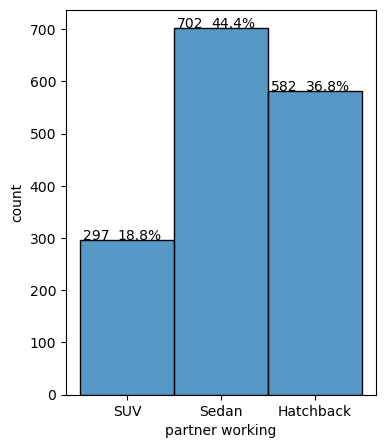

In [30]:
#  univariate analysis of make column
plt.figure(figsize=(4,5))
ax=sns.histplot(data=df,x="Make")
plt.xlabel("partner working")
plt.ylabel("count")
for p in ax.patches:
    ax.annotate(f"{p.get_height()/df.Profession.count()*100:.1f}%",(p.get_x()+0.4,p.get_height()+0.01))
    ax.annotate("{:.0f}".format(p.get_height()),(p.get_x()+0.03,p.get_height()+0.01))

most maked car is Sedan , 36.8% Hatchbach is maked ,18.8% SUV maked

###   Univariate analysis for numerical variables

In [31]:
df_num.describe()

,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price
count,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000
mean,31.922201,2.457938,60392.220114,20585.895003,79625.996205,35597.722960
std,8.425978,0.943483,14674.825044,18952.938643,25545.857768,13633.636545
min,22.000000,0.000000,30000.000000,0.000000,30000.000000,18000.000000
25%,25.000000,2.000000,51900.000000,0.000000,60500.000000,25000.000000
50%,29.000000,2.000000,59500.000000,25600.000000,78000.000000,31000.000000
75%,38.000000,3.000000,71800.000000,38000.000000,95900.000000,47000.000000
max,54.000000,4.000000,99300.000000,80500.000000,171000.000000,70000.000000


<Axes: xlabel='Age'>

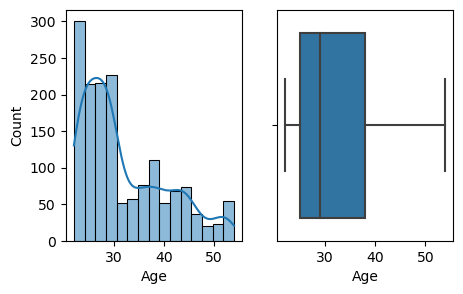

In [32]:
# Analysis of Age
fig_dims = (5, 3) 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims) 
sns.histplot(df.Age, kde=True, ax=axs[0]) 
sns.boxplot(x= 'Age', data=df, ax=axs[1]) 

most customers age in between 20 to 30

In [33]:
#check the skewness ,kurtosis of Age column 
print("skewness of age is",df['Age'].skew())
print("kurtosis of age is ", df['Age'].kurtosis())

skewness of age is 0.8930870865867485
kurtosis of age is  -0.24405428996418044


age variable is right skewed so we want make it symmertical because we want get normal distribution,
using root of 10 Transformation

0.5911857058564791
-0.7600344747237493


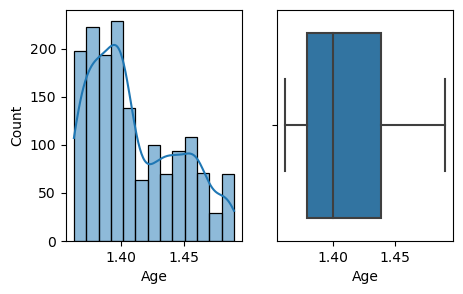

In [34]:
# Using root of 10 for transformation
print((df['Age']**0.1).skew())
print((df['Age']**0.1).kurtosis())
fig_dims = (5, 3) 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims) 
sns.histplot((df['Age']**0.1), kde=True, ax = axs[0])
sns.boxplot(x=(df.Age**0.1), ax = axs[1])
plt.show()

<Axes: xlabel='No_of_Dependents'>

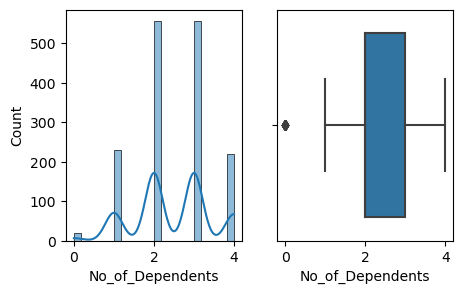

In [35]:
# Analysis of  No_of_Dependents	
fig_dims = (5, 3) 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims) 
sns.histplot(df.No_of_Dependents, kde=True, ax=axs[0]) 
sns.boxplot(x= 'No_of_Dependents', data=df, ax=axs[1]) 

median line on first quartile ,maximum of no of dependents of customers is 4,have a outlier in lower value.

<Axes: xlabel='Salary'>

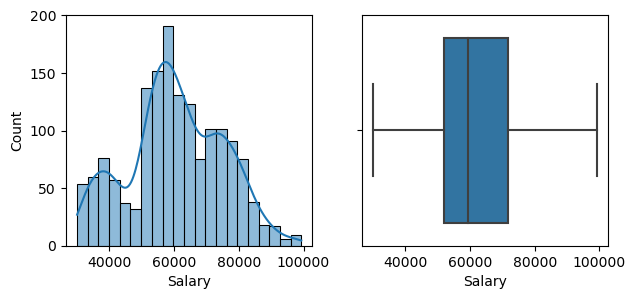

In [58]:
# Analysis of  salary
fig_dims = (7, 3) 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims) 
sns.histplot(df.Salary, kde=True, ax=axs[0]) 
sns.boxplot(x= 'Salary', data=df, ax=axs[1]) 

In [37]:
print(df.Salary.skew())
print(df.Salary.kurtosis())

-0.011570808595835032
-0.5120638956726791


skewness in between -1/2 to 1/2 is symmertical
most customers have salary  is 60000

<Axes: xlabel='Partner_salary'>

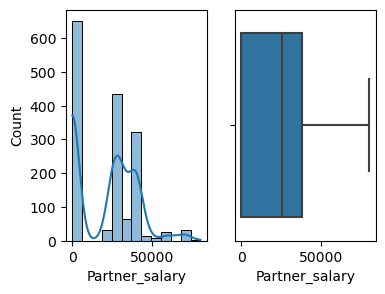

In [38]:
# Analysis of  Partner_salary	
fig_dims = (4, 3) 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims) 
sns.histplot(df.Partner_salary, kde=True, ax=axs[0]) 
sns.boxplot(x= 'Partner_salary', data=df, ax=axs[1]) 

In [39]:
print(df.Partner_salary.skew())
print(df.Partner_salary.kurtosis())

0.2919502622828292
-0.7890570180299465


it is normal distribution ,minimun of patner salary is 0.00 because 45.1% of customer have patner are not working. 

<Axes: xlabel='Total_salary'>

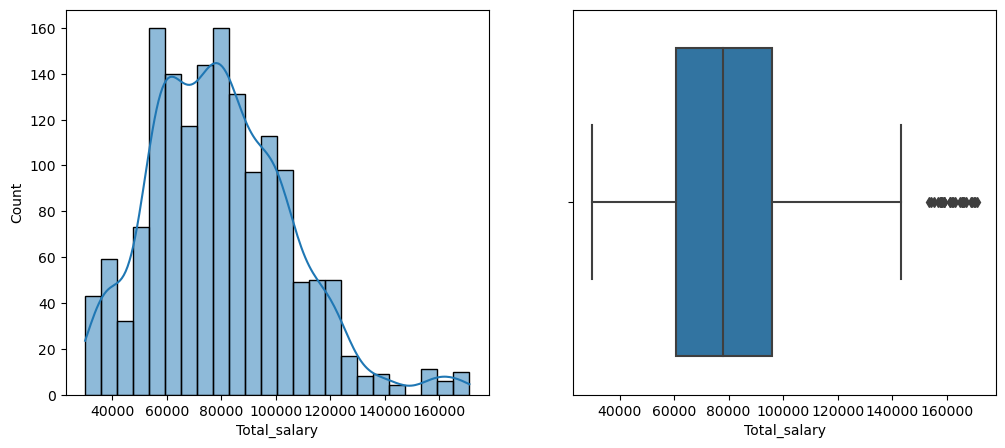

In [40]:
# Analysis of Total_salary	
fig_dims = (12, 5) 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims) 
sns.histplot(df.Total_salary, kde=True, ax=axs[0]) 
sns.boxplot(x= 'Total_salary', data=df, ax=axs[1]) 

Total salary have  many outliers in upper values
most customers have total salary in beteen 60000 to 90000

<Axes: xlabel='Price'>

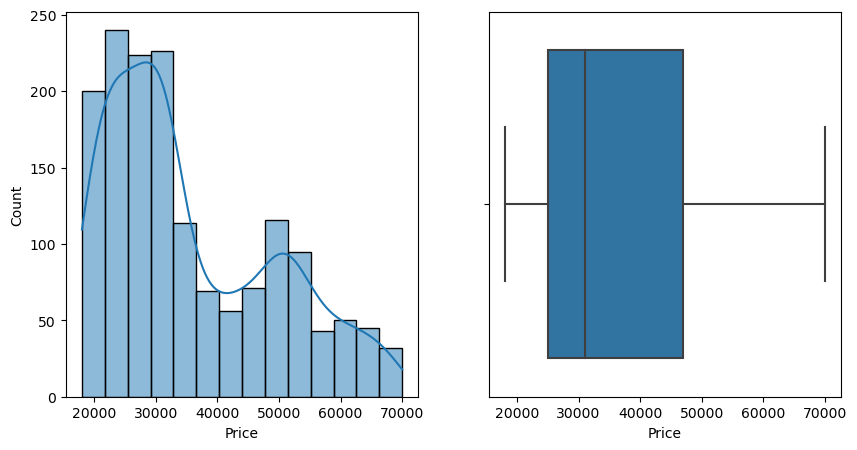

In [41]:
#  Analysis of Price	
fig_dims = (10, 5) 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims) 
sns.histplot(df.Price, kde=True, ax=axs[0]) 
sns.boxplot(x= 'Price', data=df, ax=axs[1]) 


In [42]:
#check the skewness and kurtosis
print(df.Price.skew())
print(df.Price.kurtosis())

0.7408739566673956
-0.570647541022121


 maximum of price is 70000,this is  right skewed treate use root of 10.

0.31439493794470574
-1.0175195537414463


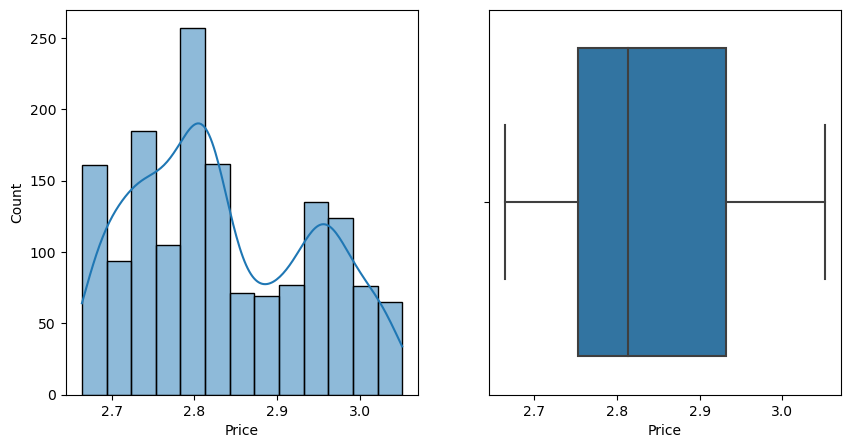

In [43]:
# Using root of 10 for transformation
print((df['Price']**0.1).skew())
print((df['Price']**0.1).kurtosis())
fig_dims = (10, 5) 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims) 
sns.histplot((df['Price']**0.1), kde=True, ax = axs[0])
sns.boxplot(x=(df.Price**0.1), ax = axs[1])
plt.show()

 ### 1.2.b)- Check for and treat (if needed) outliers 

<Axes: xlabel='Price'>

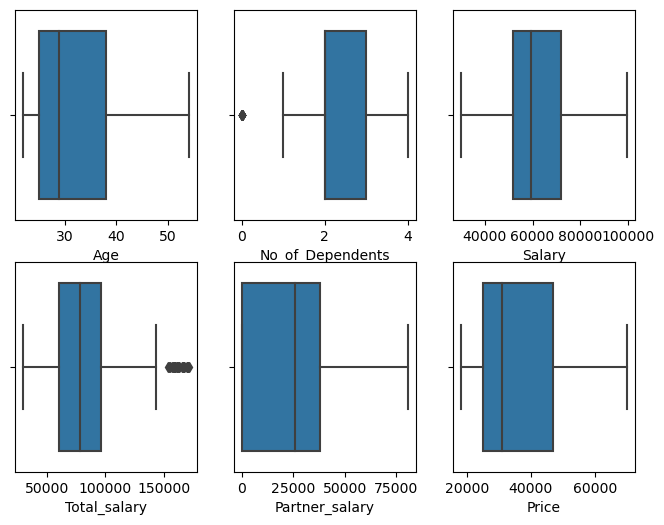

In [44]:
#plot box plot of all numerical variables
fig,axs=plt.subplots(ncols=3,nrows=2,figsize=(8,6))
sns.boxplot(data=df,x="Age",ax=axs[0][0])
sns.boxplot(data=df,x="No_of_Dependents",ax=axs[0][1])
sns.boxplot(data=df,x="Salary",ax=axs[0][2])
sns.boxplot(data=df,x="Total_salary",ax=axs[1][0])
sns.boxplot(data=df,x="Partner_salary",ax=axs[1][1])
sns.boxplot(data=df,x="Price",ax=axs[1][2])

###### No.of dependents variable have one outlier in lower value, we want to treate outliers for accurate values,remove outliers using IQR method

In [45]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [46]:
## Check the lower range and upper range for the variable 
lr,ur=remove_outlier(df['No_of_Dependents'])
print("lower range",lr, "and upper range", ur)

lower range 0.5 and upper range 4.5


In [47]:
#no of dependents  values less than lr then it will to lr else past value
df.No_of_Dependents=np.where(df.No_of_Dependents<lr,lr,df.No_of_Dependents)
#no of dependents  values greater than ur then it will to ur else past value
df.No_of_Dependents=np.where(df.No_of_Dependents>ur,ur,df.No_of_Dependents)

<Axes: xlabel='No_of_Dependents'>

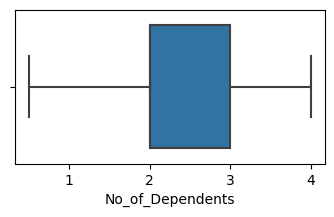

In [48]:
plt.figure(figsize=(4,2))
sns.boxplot(data=df,x='No_of_Dependents')

#### total salary variable have many outliers in higher values, we want to treate outliers for accurate values,remove outliers using IQR method

In [49]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [50]:
## Check the lower range and upper range for the variable 
lw,hi=remove_outlier(df['Total_salary'])
print("lower range",lw, "and upper range", hi)

lower range 7400.0 and upper range 149000.0


In [51]:
#total salary  values less than lw then it will to lw else past value
df.Total_salary=np.where(df.Total_salary<lw,lw,df.Total_salary)
#total salary values greater than hi it will to hi else past value
df.Total_salary=np.where(df.Total_salary>hi,hi,df.Total_salary)

<Axes: xlabel='Total_salary'>

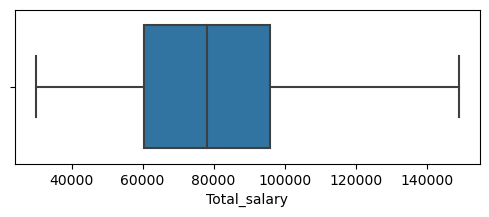

In [55]:
#plot boxplot of total salary for check outlier is go on or not
plt.figure(figsize=(6,2))
sns.boxplot(data=df,x="Total_salary")

In [56]:
df.Total_salary.describe()

count      1581.000000
mean      79398.545225
std       24849.147996
min       30000.000000
25%       60500.000000
50%       78000.000000
75%       95900.000000
max      149000.000000
Name: Total_salary, dtype: float64

### 1.2.c)-Observations and Insights

In [57]:
df.describe(include="all")

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
count,1581.000000,1581,1581,1581,1581,1581.000000,1581,1581,1581,1581.000000,1581.000000,1581.000000,1581.000000,1581
unique,NaN,2,2,2,2,NaN,2,2,2,NaN,NaN,NaN,NaN,3
top,NaN,Male,Salaried,Married,Post Graduate,NaN,Yes,No,Yes,NaN,NaN,NaN,NaN,Sedan
freq,NaN,1252,896,1443,985,NaN,792,1054,868,NaN,NaN,NaN,NaN,702
mean,31.922201,NaN,NaN,NaN,NaN,2.464263,NaN,NaN,NaN,60392.220114,20585.895003,79398.545225,35597.722960,NaN
std,8.425978,NaN,NaN,NaN,NaN,0.928532,NaN,NaN,NaN,14674.825044,18952.938643,24849.147996,13633.636545,NaN
min,22.000000,NaN,NaN,NaN,NaN,0.500000,NaN,NaN,NaN,30000.000000,0.000000,30000.000000,18000.000000,NaN
25%,25.000000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,51900.000000,0.000000,60500.000000,25000.000000,NaN
50%,29.000000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,59500.000000,25600.000000,78000.000000,31000.000000,NaN
75%,38.000000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,71800.000000,38000.000000,95900.000000,47000.000000,NaN


#### Insights
*Most individuals in the dataset are either 22 or 23 years old.

*The majority of individuals in the dataset are males.

*The dataset includes individuals with both salaried and business employment     types.

*The majority of individuals in the dataset are married.
  Some individuals are also single.
  
*Most individuals in the dataset are post-graduates, with a smaller number having    graduate degrees.

*Maximum of no.of Dependents of customer is 4.


*most similar customer have ,or not personal loan.
 maximum price is 70000
 
*salary and patner salary increases the total salary,most customer have salary in between 50000 to 80000--mean of total salary of customer is 78000 .

*most 44.4% maked car is Sedan,36.8% of maked car is Hatchback,18.8 % SUV

##  Problem 1-3 - Bivariate Analysis

## Explore the relationship between all numerical variables - Explore the correlation between all numerical variables - Explore the relationship between categorical vs numerical variables



### 1-3-a)- Explore the relationship between all numerical variables 

In [59]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   No_of_Dependents  1581 non-null   int64  
 2   Salary            1581 non-null   int64  
 3   Partner_salary    1581 non-null   float64
 4   Total_salary      1581 non-null   int64  
 5   Price             1581 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 74.2 KB


<Axes: xlabel='Total_salary', ylabel='Price'>

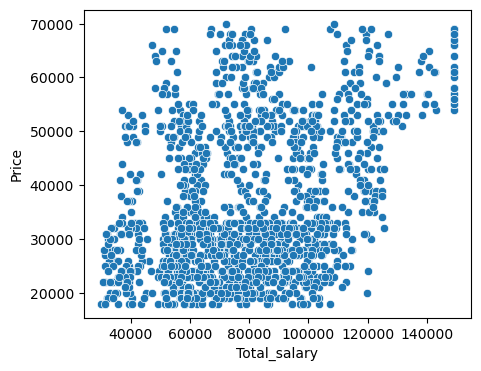

In [60]:
#plot total salary with price
plt.figure(figsize=(5,4))
sns.scatterplot(x="Total_salary", y="Price", data=df)

#### Insights:

From above plots we see that as the Total salary increases, there are some points where price also increases porpotionally.These are customers who have   high total salary are buying high price car. 

most customers are total salary in between 60000 and 80000 ,and low price car buying.

most intense at low price and low  total salary.

#we can observe every relationship between all numerical variables using pairplot.

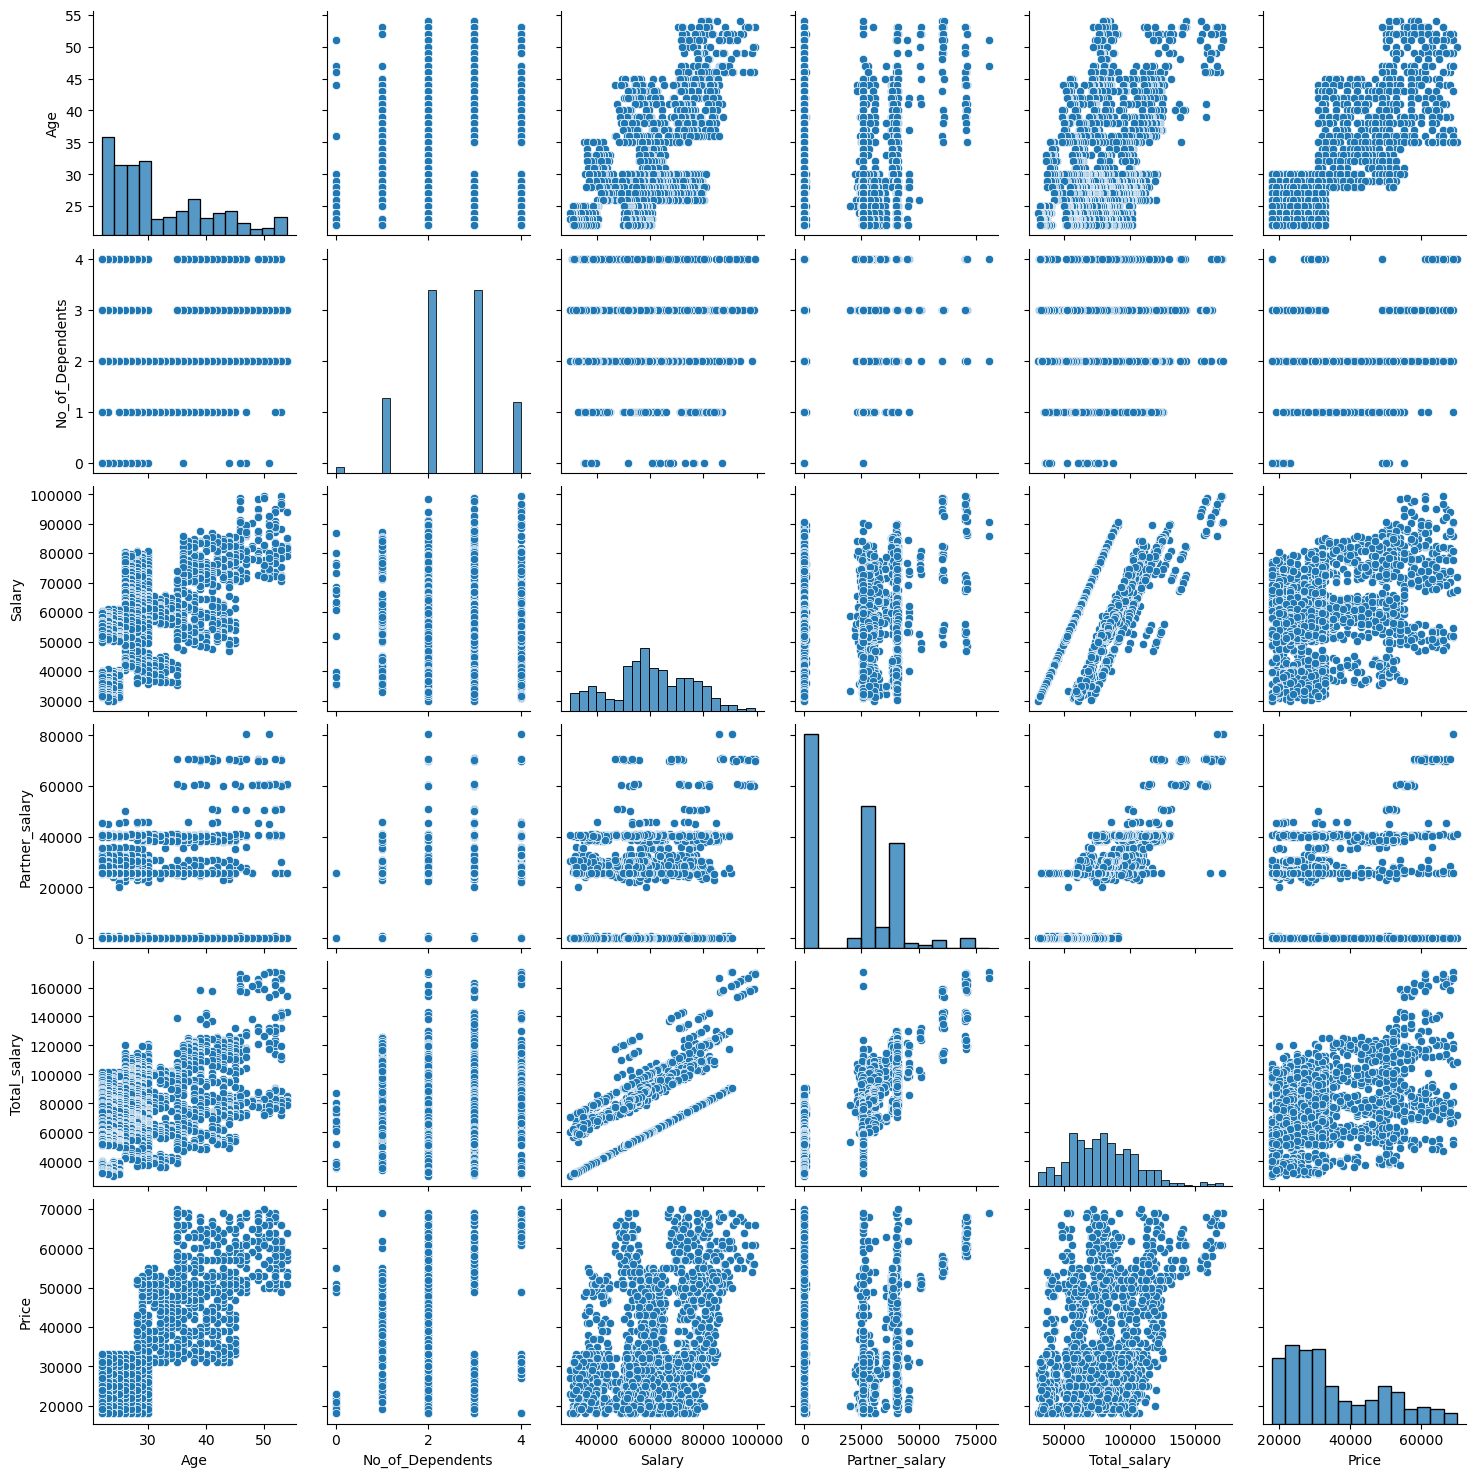

In [61]:
sns.pairplot(df_num)

all are variables are positively related except age and no.of dependents are negatively related to price and no.of dependents are negatively related

### 1-3-b)Explore the correlation between all numerical variables

In [62]:
# check correlation of data set
cor=df_num.corr()
round(cor,2)

,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price
Age,1.00,-0.19,0.62,0.12,0.46,0.80
No_of_Dependents,-0.19,1.00,-0.03,0.12,0.09,-0.14
Salary,0.62,-0.03,1.00,0.07,0.64,0.41
Partner_salary,0.12,0.12,0.07,1.00,0.77,0.16
Total_salary,0.46,0.09,0.64,0.77,1.00,0.37
Price,0.80,-0.14,0.41,0.16,0.37,1.00


<Axes: >

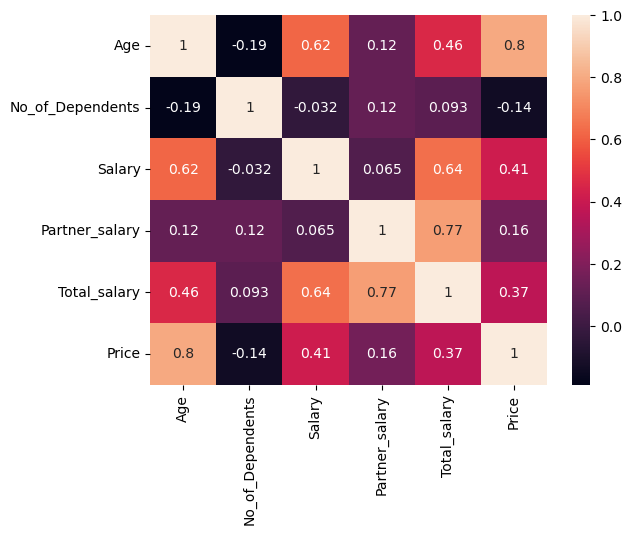

In [63]:
#plot heatmap correlation b/w variables
sns.heatmap(cor,annot=True)

Insights

We observe price is highly correlated with Age each other. Especially the price have a correlation is 0.8

There is a  negative correlation between the Age and No.of.dependents (around -0.21) this means high age  customer have low no.of dependents.

price and  no od dependents are negatively correlated

### 1-3-c) Explore the relationship between categorical vs numerical variables¶

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1581 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   float64
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   float64
 10  Partner_salary    1581 non-null   float64
 11  Total_salary      1581 non-null   float64
 12  Price             1581 non-null   float64
 13  Make              1581 non-null   object 
dtypes: float64(5), int64(1), object(8)
memory usage: 173.1+ KB


<Axes: xlabel='Gender', ylabel='Price'>

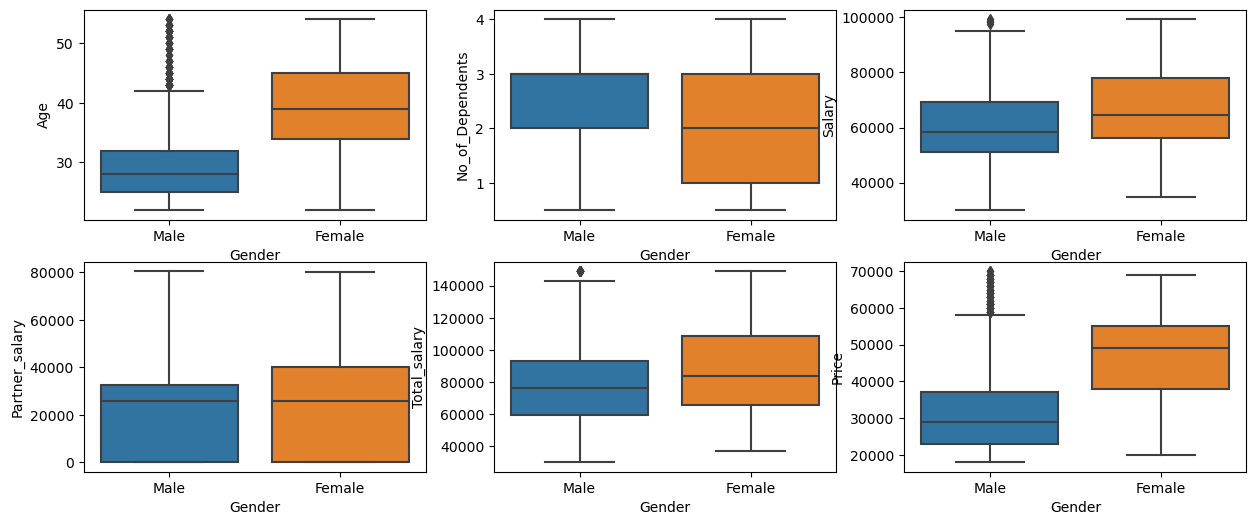

In [65]:
# plot gender column with other numerical variables
fig, axs = plt.subplots(nrows=2,ncols=3,figsize=(15,6))
sns.boxplot(x='Gender', y='Age', data=df, ax=axs[0][0])
sns.boxplot(x='Gender', y='No_of_Dependents', data=df, ax=axs[0][1])
sns.boxplot(x='Gender', y='Salary', data=df, ax=axs[0][2])
sns.boxplot(x='Gender', y='Partner_salary', data=df, ax=axs[1][0])
sns.boxplot(x='Gender', y='Total_salary', data=df, ax=axs[1][1])
sns.boxplot(x='Gender', y='Price', data=df, ax=axs[1][2])

#### Insights
We see that median value of the price for male is less compared to that of female.male have many outliers in high price.

There is no difference in patner salary in between male and female.
median value of total salary of female is higher than male.

<Axes: xlabel='Profession', ylabel='Price'>

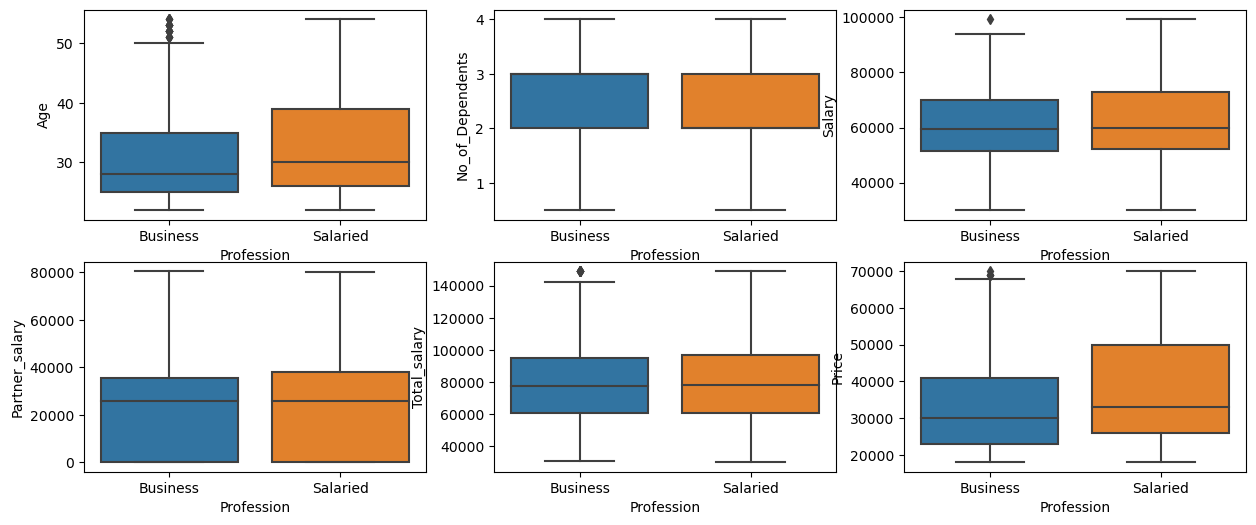

In [66]:
# plot profession column with other numerical variables
fig, axs = plt.subplots(nrows=2,ncols=3,figsize=(15,6))
sns.boxplot(x='Profession', y='Age', data=df, ax=axs[0][0])
sns.boxplot(x='Profession', y='No_of_Dependents', data=df, ax=axs[0][1])
sns.boxplot(x='Profession', y='Salary', data=df, ax=axs[0][2])
sns.boxplot(x='Profession', y='Partner_salary', data=df, ax=axs[1][0])
sns.boxplot(x='Profession', y='Total_salary', data=df, ax=axs[1][1])
sns.boxplot(x='Profession', y='Price', data=df, ax=axs[1][2])

Insights
We see that median value of the price for business customer is less compared to that of salaried customers.business have outliers in high price.

There is no difference in total salary in between business and salaried customers. 


<Axes: xlabel='Marital_status', ylabel='Price'>

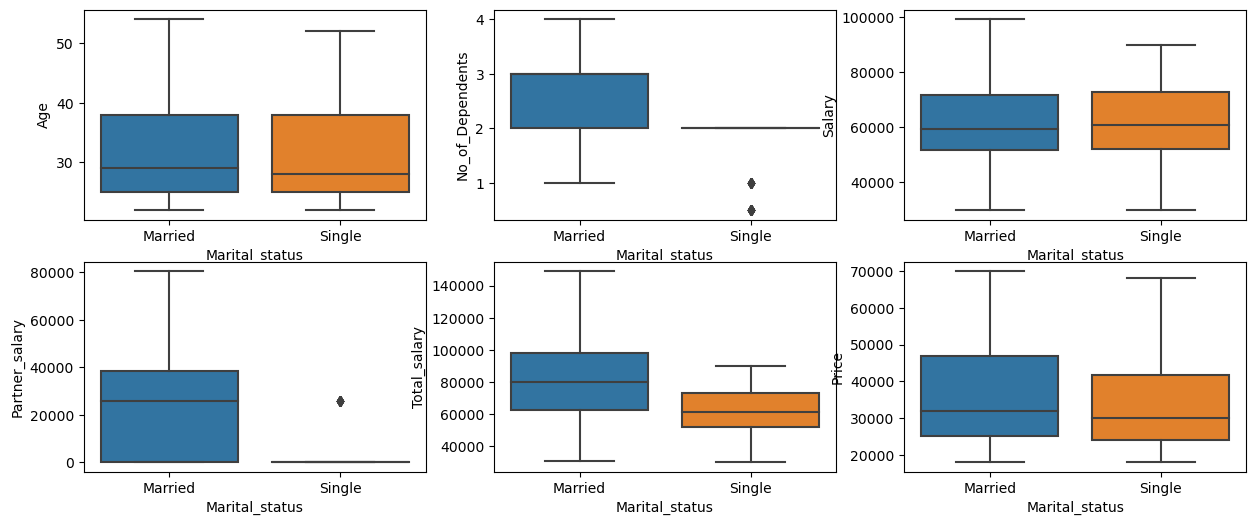

In [67]:
# plot marital status column with other numerical variables
fig, axs = plt.subplots(nrows=2,ncols=3,figsize=(15,6))
sns.boxplot(x='Marital_status', y='Age', data=df, ax=axs[0][0])
sns.boxplot(x='Marital_status', y='No_of_Dependents', data=df, ax=axs[0][1])
sns.boxplot(x='Marital_status', y='Salary', data=df, ax=axs[0][2])
sns.boxplot(x='Marital_status', y='Partner_salary', data=df, ax=axs[1][0])
sns.boxplot(x='Marital_status', y='Total_salary', data=df, ax=axs[1][1])
sns.boxplot(x='Marital_status', y='Price', data=df, ax=axs[1][2])

<Axes: xlabel='Education', ylabel='Price'>

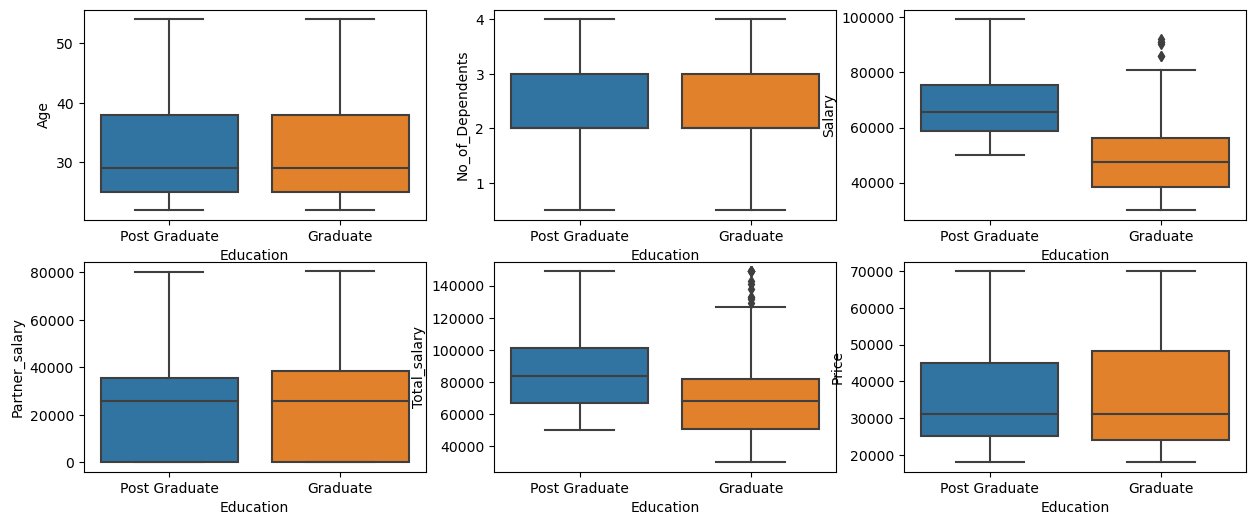

In [68]:
# plot education column with other numerical variables
fig, axs = plt.subplots(nrows=2,ncols=3,figsize=(15,6))
sns.boxplot(x='Education', y='Age', data=df, ax=axs[0][0])
sns.boxplot(x='Education', y='No_of_Dependents', data=df, ax=axs[0][1])
sns.boxplot(x='Education', y='Salary', data=df, ax=axs[0][2])
sns.boxplot(x='Education', y='Partner_salary', data=df, ax=axs[1][0])
sns.boxplot(x='Education', y='Total_salary', data=df, ax=axs[1][1])
sns.boxplot(x='Education', y='Price', data=df, ax=axs[1][2])

<Axes: xlabel='Personal_loan', ylabel='Price'>

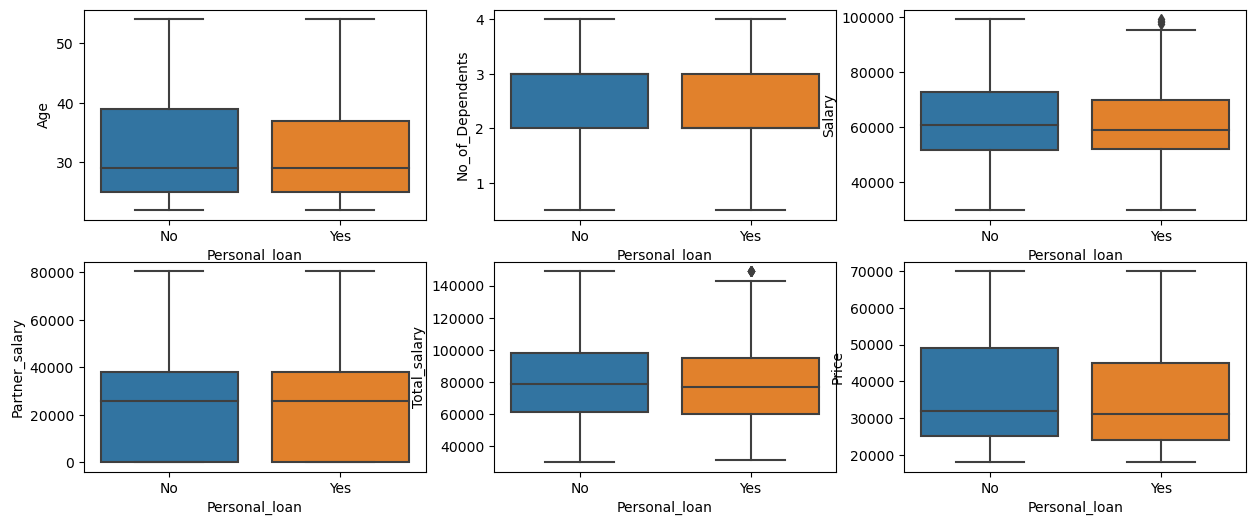

In [69]:
# plot personal loan column with other numerical variables
fig, axs = plt.subplots(nrows=2,ncols=3,figsize=(15,6))
sns.boxplot(x='Personal_loan', y='Age', data=df, ax=axs[0][0])
sns.boxplot(x='Personal_loan', y='No_of_Dependents', data=df, ax=axs[0][1])
sns.boxplot(x='Personal_loan', y='Salary', data=df, ax=axs[0][2])
sns.boxplot(x="Personal_loan", y='Partner_salary', data=df, ax=axs[1][0])
sns.boxplot(x='Personal_loan', y='Total_salary', data=df, ax=axs[1][1])
sns.boxplot(x='Personal_loan', y='Price', data=df, ax=axs[1][2])

<Axes: xlabel='House_loan', ylabel='Price'>

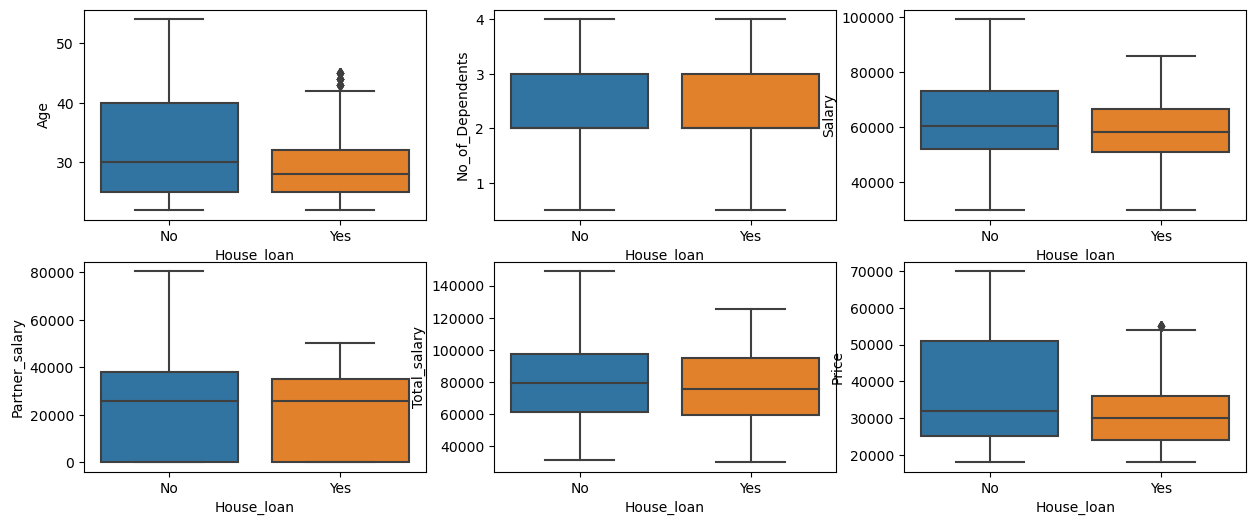

In [70]:
# plot House loan column with other numerical variables
fig, axs = plt.subplots(nrows=2,ncols=3,figsize=(15,6))
sns.boxplot(x='House_loan', y='Age', data=df, ax=axs[0][0])
sns.boxplot(x="House_loan", y='No_of_Dependents', data=df, ax=axs[0][1])
sns.boxplot(x="House_loan", y='Salary', data=df, ax=axs[0][2])
sns.boxplot(x="House_loan", y='Partner_salary', data=df, ax=axs[1][0])
sns.boxplot(x='House_loan', y='Total_salary', data=df, ax=axs[1][1])
sns.boxplot(x='House_loan', y='Price', data=df, ax=axs[1][2])

<Axes: xlabel='Partner_working', ylabel='Price'>

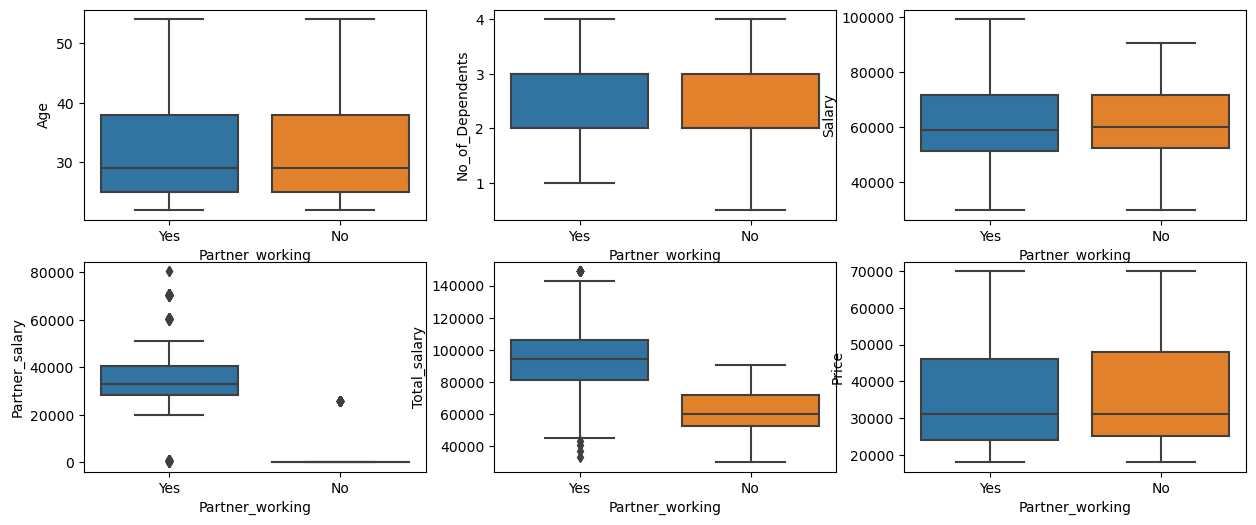

In [71]:
# plot partner column with other numerical variables
fig, axs = plt.subplots(nrows=2,ncols=3,figsize=(15,6))
sns.boxplot(x="Partner_working", y='Age', data=df, ax=axs[0][0])
sns.boxplot(x='Partner_working', y='No_of_Dependents', data=df, ax=axs[0][1])
sns.boxplot(x='Partner_working', y='Salary', data=df, ax=axs[0][2])
sns.boxplot(x="Partner_working", y='Partner_salary', data=df, ax=axs[1][0])
sns.boxplot(x='Partner_working', y='Total_salary', data=df, ax=axs[1][1])
sns.boxplot(x='Partner_working', y='Price', data=df, ax=axs[1][2])

<Axes: xlabel='Make', ylabel='Price'>

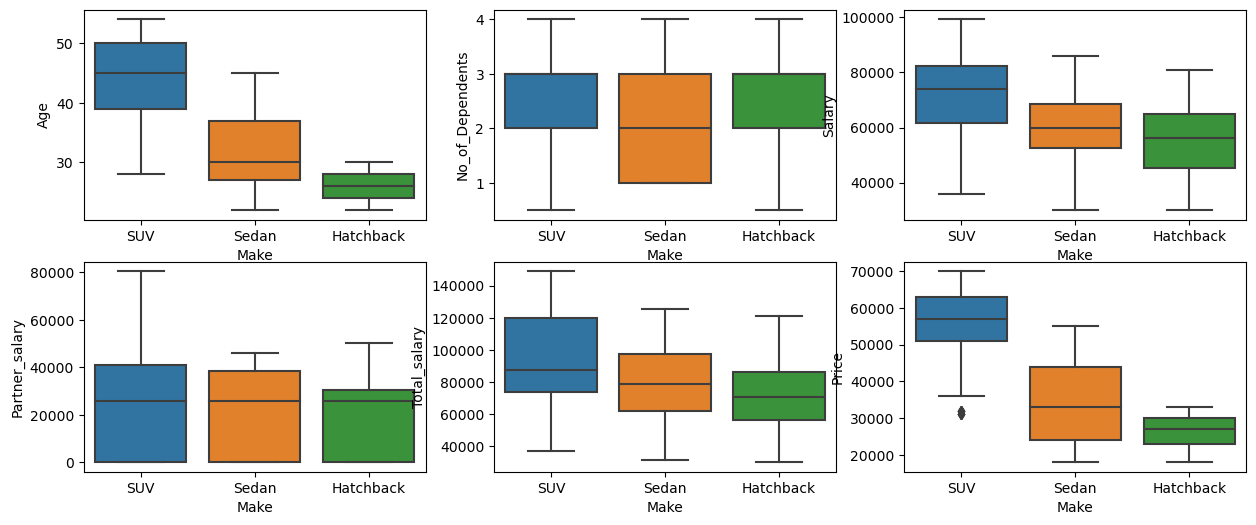

In [72]:
# plot make column with other numerical variables
fig, axs = plt.subplots(nrows=2,ncols=3,figsize=(15,6))
sns.boxplot(x="Make", y='Age', data=df, ax=axs[0][0])
sns.boxplot(x='Make', y='No_of_Dependents', data=df, ax=axs[0][1])
sns.boxplot(x='Make', y='Salary', data=df, ax=axs[0][2])
sns.boxplot(x="Make", y='Partner_salary', data=df, ax=axs[1][0])
sns.boxplot(x='Make', y='Total_salary', data=df, ax=axs[1][1])
sns.boxplot(x='Make', y='Price', data=df, ax=axs[1][2])

#### Insights¶
We see that median value of the price for sedan ,Hatchback cars is less compared to that of SUV.

There is no difference in median  Partner salary amount between these
 3 cars


<Axes: xlabel='Make', ylabel='Price'>

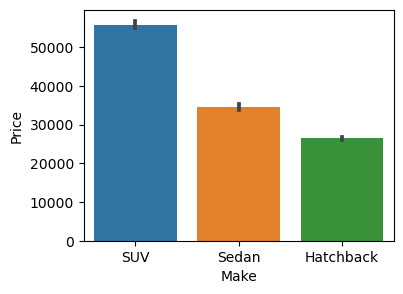

In [73]:
# plot make column with price  variable
fig = plt.subplots(figsize=(4,3))
sns.barplot(x='Make', y='Price', data=df)

we can see that in make list of company the  Highest price for SUV car,then Sedan,then Hatchback.

### Problem 1-4-1) - Key Questions
Explore the data to answer the following key questions: 1. Do men tend to prefer SUVs more compared to women? 2. What is the likelihood of a salaried person buying a Sedan? 3. What evidence or data supports Sheldon Cooper's claim that a salaried male is an easier target for a SUV sale over a Sedan sale? 4. How does the amount spent on purchasing automobiles vary by gender? 5. How much money was spent on purchasing automobiles by individuals who took a personal loan? 6. How does having a working partner influence the purchase of higher-priced cars?

### 1-4-1) Do men tend to prefer SUVs more compared to women? 

<Axes: xlabel='Make', ylabel='count'>

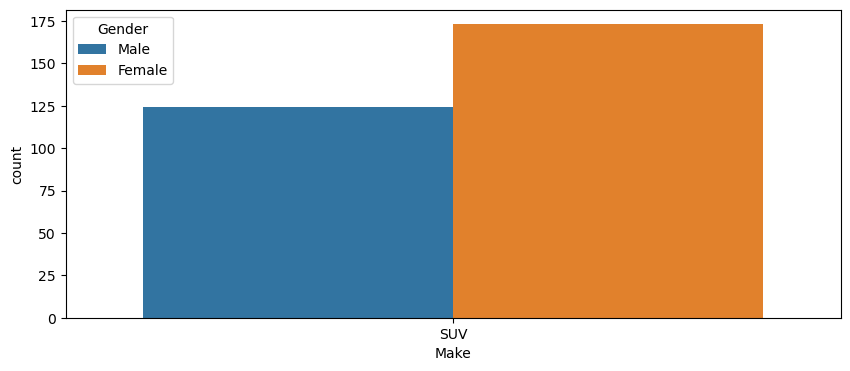

In [74]:
# create data frame with maked car is  equal to SUV
g=df[df.Make=="SUV"]
plt.figure(figsize=(10,4))
sns.countplot(x="Make",data=g,hue="Gender")

In [75]:
pd.crosstab(g.Gender,g.Make,normalize=True)

Make,SUV
Gender,
Female,0.582492
Male,0.417508


we can see don't men to prefer SUVs more than women.
Female customers are more prefer SUV.

### 1-4-2). What is the likelihood of a salaried person buying a Sedan? 

#Likelihood = (Number of salaried individuals who bought Sedans) / (Total number of salaried individuals)

In [76]:
#create data frame with profession is equal to salaried customers
n=df[df.Profession=="Salaried"]

In [77]:
# create table with cross the profession ,make column
pd.crosstab(n.Profession,n.Make, margins=True,normalize=True)

Make,Hatchback,SUV,Sedan,All
Profession,,,,
Salaried,0.325893,0.232143,0.441964,1.0
All,0.325893,0.232143,0.441964,1.0


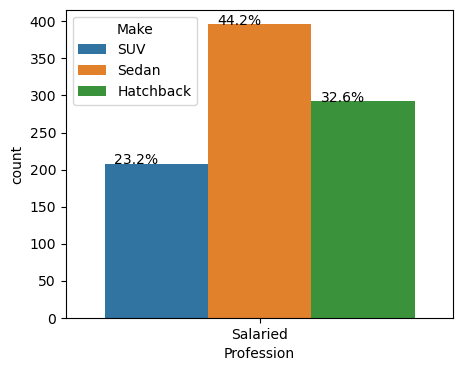

In [78]:
# plot the bar of profession is equal to salaried customer with make 
plt.figure(figsize=(5,4))
ax=sns.countplot(data=n,x="Profession",hue="Make")
for p in ax.patches:
      ax.annotate(f"{p.get_height()/n.Profession.count()*100:.1f}%",(p.get_x()+0.025,p.get_height()+0.01))

So, the likelihood of a salaried person buying a Sedan is approximately 0.4419, or about 44.2%.higher than other two cars.


### 1-4-3). What evidence or data supports Sheldon Cooper's claim that a salaried male is an easier target for a SUV sale over a Sedan sale?

Sedan        305
Hatchback    277
SUV           90
Name: Make, dtype: int64


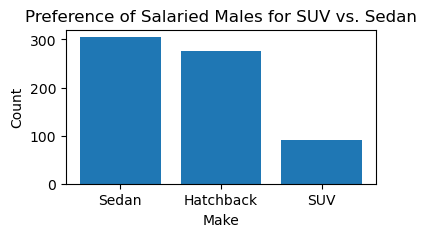

In [79]:
# Filter the DataFrame for salaried males
salaried_males = df[(df.Gender== 'Male') & (df.Profession == 'Salaried')]

# Count the number of SUVs and Sedans among salaried males
vehicle_counts = salaried_males['Make'].value_counts()
print(vehicle_counts)
# Create a bar chart
plt.figure(figsize=(4,2))
plt.bar(vehicle_counts.index, vehicle_counts.values)
plt.xlabel('Make')
plt.ylabel('Count')
plt.title('Preference of Salaried Males for SUV vs. Sedan')
plt.show()

we can see that salaried male is an easier target for a Sedan sale over a SUV  sale,so Sheldon Cooper's claim  is wrong.

### 1-4-4). How does the  amount spent on purchasing automobiles vary by gender? 

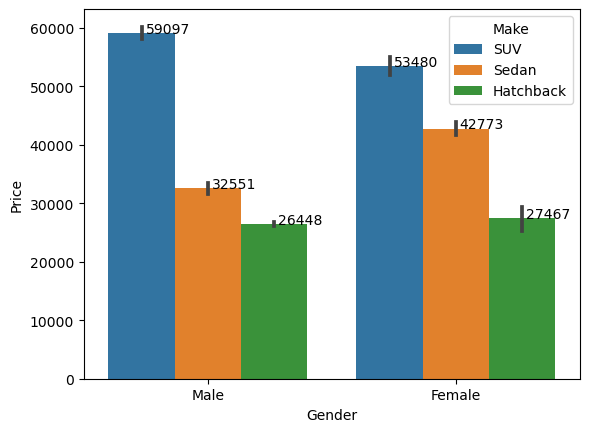

In [80]:
#plot the bar plot of Gender,Price with Make.
ax=sns.barplot(data=df,x="Gender",y="Price",hue="Make")
for p in ax.patches:
    ax.annotate("{:.0f}".format(p.get_height()),(p.get_x()+0.15,p.get_height()+0.01))



*we can see that the highest amount was spent on purchasing an SUV, then a Sedan, then a Hatchback 
*Males spend more amount spent on purchasing an SUV than Females.
*Females have a higher amount on purchasing Sedans than Males.
*Females spend a little higher amount spent on purchasing Hatchback than males.


###  1-4-5). How much money was spent on purchasing automobiles by individuals who took a personal loan? 

In [81]:
#  creating data frame with customers have personal loan
m=df[df.Personal_loan=="Yes"]
m
#check the sum of  price in customers who have a personal loan
m["Price"].sum()

27290000.0

people who took Personal loans spent a total of 27290000.0 amount spent on purchasing automobiles

### 1-4- 6). How does having a working partner influence the purchase of higher-priced cars?



In [82]:
#create a dataframe this have partners are working
s=df[df.Partner_working=="Yes"]


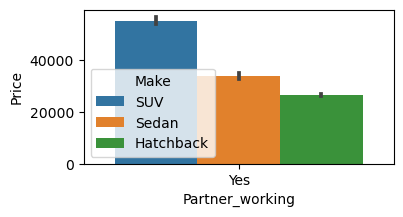

In [83]:
#plot bar plot of working partners and price with make 
plt.figure(figsize=(4,2))
ax=sns.barplot(data=s,x="Partner_working",y="Price",hue="Make")

more working partners influence purchasing heighest cost for SUV. second  Sedan then Hatchback.
 Individuals with working partners tend to purchase higher-priced cars. 

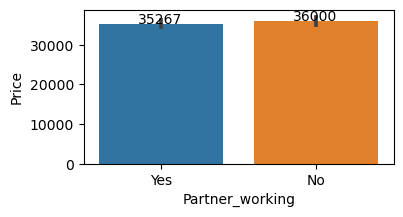

In [84]:
# ploting barplot of partner woring and price
plt.figure(figsize=(4,2))
ax=sns.barplot(data=df,x="Partner_working",y="Price")
for p in ax.patches:
    ax.annotate("{:.0f}".format(p.get_height()),(p.get_x()+0.25,p.get_height()+0.01))


working partners and non working partners influence purchasing high priced cars approximately both are same.
little higher non working partners than working partners.


### 1-5) - Actionable Insights & Recommendations
- Actionable Insights - Business Recommendations

### Actionable Insights:

##### Salaried Individuals Prefer Sedan:
The data indicates that a significant number of salaried individuals prefer Sedan cars. This insight could be used for marketing strategies, such as offering promotions or discounts on Sedan models to attract salaried customers.

##### Marital Status Affects Car Choice: 
Marital status seems to influence the choice of car. Married individuals are more likely to purchase sedans, while single individuals often choose hatchbacks. Tailoring advertising and promotions to specific marital statuses can be effective.

##### Post Graduates Prefer Sedans:
Post-graduate individuals tend to opt for sedans, which are often considered more upscale. Marketing campaigns could target this educated demographic with features and benefits that align with their preferences.

###### Working Partners Impact Car Prices:
Individuals with working partners tend to purchase higher-priced cars. This suggests that dual-income households may have more purchasing power and are willing to invest in more expensive vehicles. Dealerships can cater to this segment by offering premium car options and financing solutions.

###### Graduate and Post Graduate Customers: 
Customers with higher education levels (graduate and post-graduate) are more likely to purchase sedans. Dealerships can leverage this information by showcasing the advanced features and luxury aspects of sedans to attract this educated customer base.

### *Business Recommendations:

###### Segmented Marketing:
Tailor marketing campaigns based on customer demographics such as age, gender, marital status, and education level. Create targeted advertisements highlighting features that appeal to specific segments, like safety for families or luxury for well-educated individuals.

###### Offer Financing Options: 
Recognize that customers with working partners may have higher purchasing power. Offer flexible financing options and packages for higher-priced cars to make them more accessible to this segment.

###### Promote Sedan to Salaried Individuals:
Develop promotions and incentives for salaried individuals to consider  Sedan models. Emphasize affordability, fuel efficiency, and practicality in marketing campaigns.

###### Educate Customers: 
For graduate and post-graduate customers, provide information about the advanced technology, safety features, and luxury aspects of sedans. Highlight the long-term benefits and value of these vehicles.

###### Market to Single Individuals:
Since single individuals tend to choose hatchbacks, create marketing messages that resonate with their lifestyle, emphasizing flexibility, style, and affordability.

###### Customer Loyalty Programs:
Implement customer loyalty programs to retain customers and encourage repeat purchases. Offer benefits such as discounts on maintenance services, accessories, or future car purchases.

###### Data-Driven Decision-Making:
Continuously analyze customer data to refine marketing strategies and product offerings. Stay updated with changing customer preferences and adjust business strategies accordingly.

automotive dealerships can better meet the needs and preferences of their target customer segments, ultimately driving sales and customer satisfaction.

 


## Problem 2
##### Context
A bank generates revenue through interest, transaction fees, and financial advice, with interest charged on customer loans being a significant source of profits. GODIGT Bank, a mid-sized private bank, offers various banking products and cross-sells asset products to existing customers through different communication methods. However, the bank is facing high credit card attrition, leading them to reevaluate their credit card policy to ensure customers receive the right card for higher spending and intent, resulting in profitable relationships.

##### Objective
As a Data Scientist at the company and the Data Science team has shared some data. You are supposed to find the key variables that have a vital impact on the analysis which will help the company to improve the business

### Problem 2 - Framing Analytics Problem
##### Analyse the dataset and list down the top 5 important variables, along with the business justifications.

In [85]:
# read the data set
dg=pd.read_excel("godigt_cc_data .xlsx")

In [86]:
# check no.of columns and no.of rows
print("no.of rows:",dg.shape[0],"\nno.of columns:",dg.shape[1])

no.of rows: 8448 
no.of columns: 28


In [87]:
#check the data types of columns
dg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8448 entries, 0 to 8447
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   userid                   8448 non-null   int64         
 1   card_no                  8448 non-null   object        
 2   card_bin_no              8448 non-null   int64         
 3   Issuer                   8448 non-null   object        
 4   card_type                8448 non-null   object        
 5   card_source_date         8448 non-null   datetime64[ns]
 6   high_networth            8448 non-null   object        
 7   active_30                8448 non-null   int64         
 8   active_60                8448 non-null   int64         
 9   active_90                8448 non-null   int64         
 10  cc_active30              8448 non-null   int64         
 11  cc_active60              8448 non-null   int64         
 12  cc_active90              8448 non-

missing values in the Transactor_revolver column, we want to treat the missing values. other data are good.

In [88]:
#print first 5 rows
dg.head()

,userid,card_no,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,...,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit
0,1,4384 39XX XXXX XXXX,438439,Visa,edge,2019-09-29,B,0,1,1,...,27,0,0,0,0,0,T,27729,Self Employed,290000
1,2,4377 48XX XXXX XXXX,437748,Visa,prosperity,2002-10-30,A,1,1,1,...,52,0,0,0,0,0,R,280854,0,950000
2,3,4377 48XX XXXX XXXX,437748,Visa,rewards,2013-10-05,C,0,0,0,...,23,1,0,0,0,0,R,70587,Student,210000
3,4,4258 06XX XXXX XXXX,425806,Visa,indianoil,1999-06-01,E,0,1,1,...,49,0,0,1,0,0,T,9156,Self Employed,80000
4,5,4377 48XX XXXX XXXX,437748,Visa,edge,2006-06-13,B,1,1,1,...,21,1,0,0,0,0,T,38108,Salaried,220000


In [89]:
# treat missing values in the Transactor revolver column to mode data of the column
dg['Transactor_revolver'].fillna(dg['Transactor_revolver'].mode()[0], inplace=True)

dg[dg.Transactor_revolver.isnull()]


,userid,card_no,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,...,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit


In [90]:
# check null values after treatment
dg.isnull().sum()

userid                     0
card_no                    0
card_bin_no                0
Issuer                     0
card_type                  0
card_source_date           0
high_networth              0
active_30                  0
active_60                  0
active_90                  0
cc_active30                0
cc_active60                0
cc_active90                0
hotlist_flag               0
widget_products            0
engagement_products        0
annual_income_at_source    0
other_bank_cc_holding      0
bank_vintage               0
T+1_month_activity         0
T+2_month_activity         0
T+3_month_activity         0
T+6_month_activity         0
T+12_month_activity        0
Transactor_revolver        0
avg_spends_l3m             0
Occupation_at_source       0
cc_limit                   0
dtype: int64

now there no null values.

##### we can seen that high values on credit limit,average spend in last 3 month,annual income we want treate them using log function.

In [91]:
#create a column put into the log of  credit limit 
dg['cc_limit_log'] = np.log(dg['cc_limit']+1)
#create a column put into the log of  average spending in last 3 month
dg["avg_spends_13m_log"]=np.log(dg["avg_spends_l3m"]+1)
##create a column put into the log of  annual income
dg["annual_income_at_source_log"]=np.log(dg["annual_income_at_source"]+1)

In [92]:
#check duplicates
q=dg.duplicated
dg[q]

,userid,card_no,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,...,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit,cc_limit_log,avg_spends_13m_log,annual_income_at_source_log


#univariate analysis

<Axes: xlabel='Issuer', ylabel='Count'>

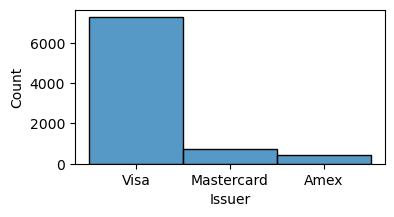

In [93]:
# plot  his plot of issuer column
plt.figure(figsize=(4,2))
sns.histplot(data=dg,x="Issuer")

most number of  issuers are visa card.

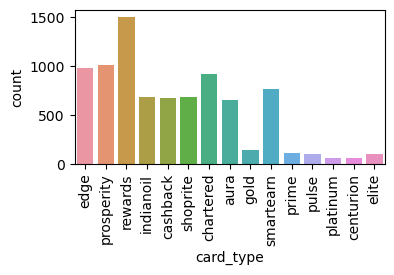

In [94]:
# plot count plot of card type
plt.figure(figsize=(4,2))
sns.countplot(data=dg,x="card_type")
plt.xticks(rotation=90);

rewards credit card type is most using.
platinum credit card is less using.

<Axes: xlabel='high_networth', ylabel='count'>

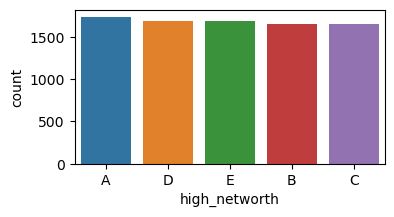

In [95]:
# plot the  net worth of  each individuals.
plt.figure(figsize=(4,2))
sns.countplot(data=dg,x="high_networth",order=dg.high_networth.value_counts().index)

more customers  are A (high worth)type . 
other customers are approximately the same

<Axes: xlabel='cc_active90', ylabel='count'>

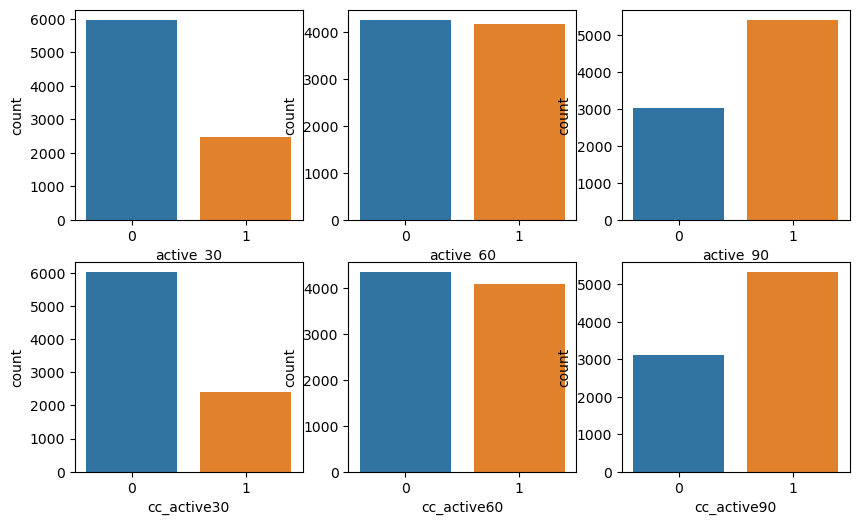

In [96]:
#plot account and cc activity of last 30,60,90 days using suplot
fig_dims = (10,6) 
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=fig_dims)
sns.countplot(data=dg,x="active_30",ax=axs[0][0])
sns.countplot(data=dg,x="active_60",ax=axs[0][1])
sns.countplot(data=dg,x="active_90",ax=axs[0][2])
sns.countplot(data=dg,x="cc_active30",ax=axs[1][0])
sns.countplot(data=dg,x="cc_active60",ax=axs[1][1])
sns.countplot(data=dg,x="cc_active90",ax=axs[1][2])

go to 90 to 30 we see that account activity is decreasing, inactivity is increasing. same as 90 to 60. *This means the last 30 days' account activity is much less than inactivity. *The credit card activity same as the account activity.

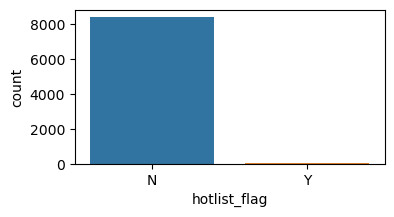

In [97]:
# plot credit card have any issues or not
plt.figure(figsize=(4,2))
ax=sns.countplot(data=dg,x="hotlist_flag")

most credit card have no problems.

<Axes: xlabel='widget_products', ylabel='count'>

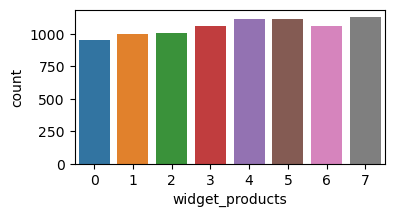

In [98]:
# plot no.of  convenience products customer use
plt.figure(figsize=(4,2))
sns.countplot(data=dg,x="widget_products")

most customers have 7 Number of convenience products customer holds. then 4,5 number of convenience products.

<Axes: xlabel='engagement_products', ylabel='count'>

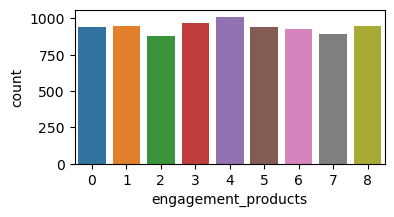

In [99]:
# plot the number of investments/loan products the customer holds.
plt.figure(figsize=(4,2))
sns.countplot(data=dg,x="engagement_products")

more customer have 4  Number of investment/loan products the customer holds .
more customer have  Number of investment/loan products the customer holds .

<Axes: xlabel='other_bank_cc_holding', ylabel='count'>

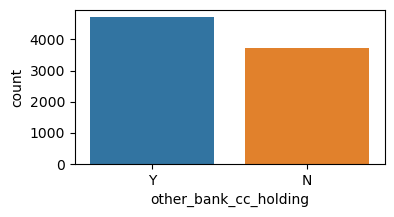

In [100]:
# plot whether the customer holds another bank credit card
plt.figure(figsize=(4,2))
sns.countplot(data=dg,x="other_bank_cc_holding")

most customers holding other bank credit card

<Axes: xlabel='T+12_month_activity', ylabel='count'>

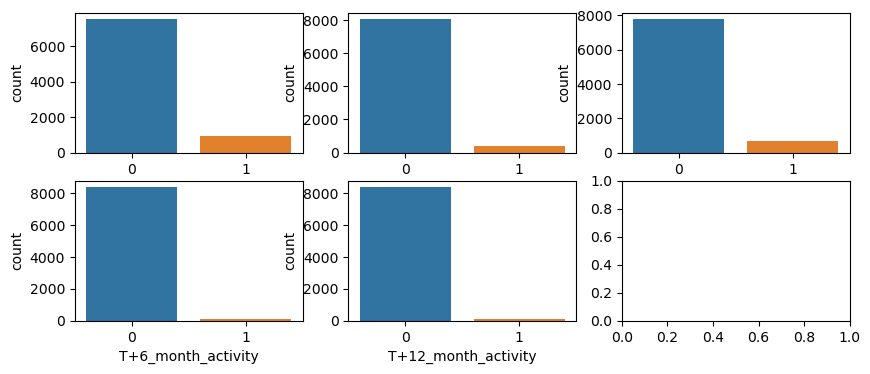

In [101]:
# plot customers whether uses credit card in T+1,2,3,6,12 month in future
fig_dims = (10,4) 
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=fig_dims)
sns.countplot(data=dg,x="T+1_month_activity",ax=axs[0][0])
sns.countplot(data=dg,x="T+2_month_activity",ax=axs[0][1])
sns.countplot(data=dg,x="T+3_month_activity",ax=axs[0][2])
sns.countplot(data=dg,x="T+6_month_activity",ax=axs[1][0])
sns.countplot(data=dg,x="T+12_month_activity",ax=axs[1][1])

*very low customers uses credit card in T+1,T+2,T+3,T+6,T+12 month(future) .
future activity is decreasing T+1 to T+2,month activity increasing T+2 to T+3,
then decreasing T+3 t0 T+6,then decreasing T+6 to T+12.
*we can see that month activity is much less than inactivity

<Axes: xlabel='Transactor_revolver', ylabel='count'>

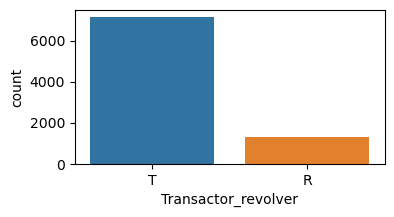

In [102]:
#plot count plot of 'Transactor_revolver' column
plt.figure(figsize=(4,2))
sns.countplot(data=dg,x="Transactor_revolver")

more customer  Customer who pays off their balances in full every month (T)
less customers carry balances over from one month to the next(R)

<Axes: xlabel='Occupation_at_source', ylabel='count'>

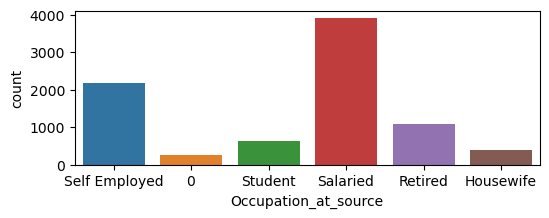

In [103]:
plt.figure(figsize=(6,2))
sns.countplot(data=dg,x="Occupation_at_source")

more customer are salaried,low customer have  no occupation.

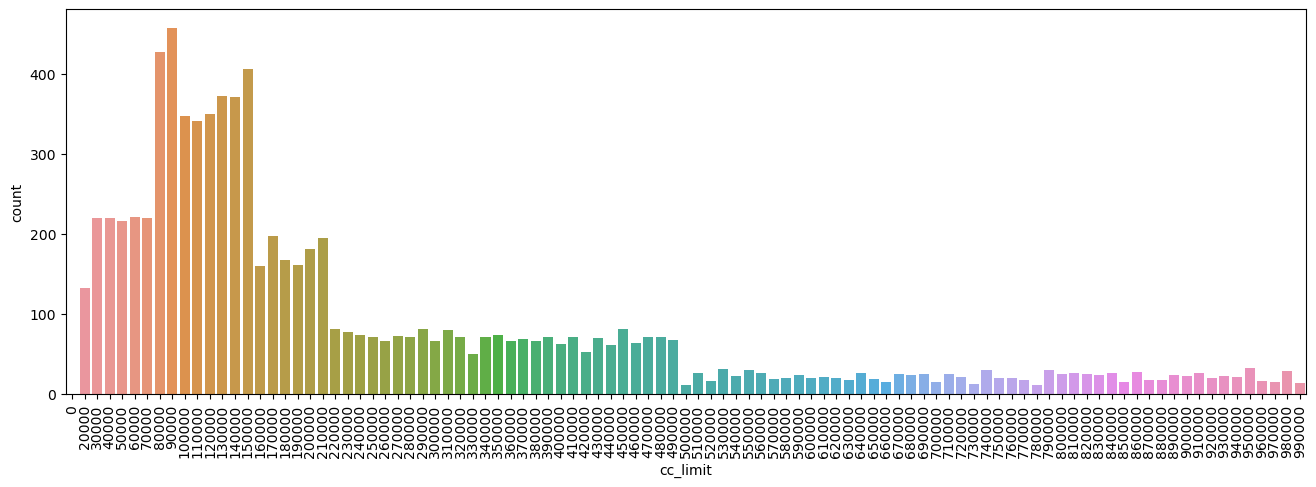

In [104]:
plt.figure(figsize=(16,5))
sns.countplot(data=dg,x="cc_limit")
plt.xticks(rotation=90);

we can see most customers are having low credit limits.so credit will lead to card attrition.

In [105]:
Bivariate analysis

SyntaxError: invalid syntax (4907393.py, line 1)

In [ ]:
# polt card type with different issuer 
plt.figure(figsize=(5,2))
sns.countplot(data=dg,x="card_type",hue="Issuer")
plt.xticks(rotation=90);

most number of card rewards mostly produced by visa companies.
most credit cards are produced by visa companies.
all 3 companies are producing rewards, and smart earn credit cards.
The lowest number of cards 
is platinum is produced by Amex company.

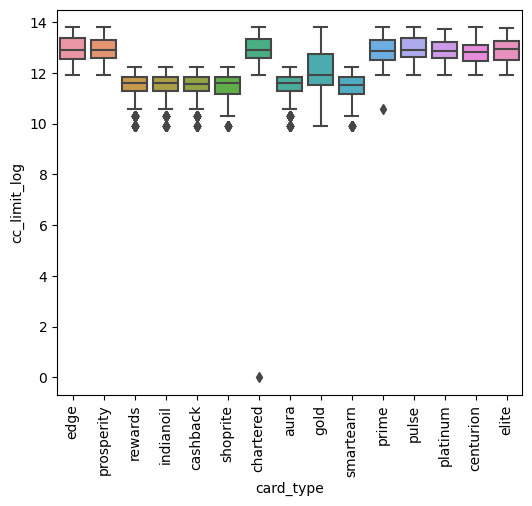

In [106]:
#plot card type with credit limit
plt.figure(figsize=(6,5))
sns.boxplot(data=dg,x="card_type",y="cc_limit_log")
plt.xticks(rotation=90);

rewards card is most customers use, the credit limit of rewards card is very low.
very less customers using platinum cards have higher credit limits than rewards.
high credit limits for the edge, prosperity, and chartered cards are approximately same.

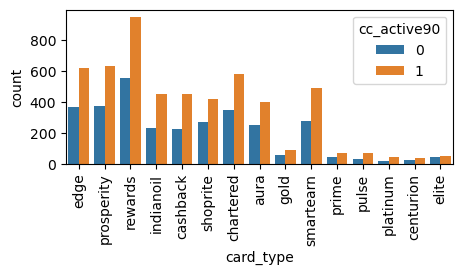

In [107]:
#  plot which cards are active or inactive in last 90 days
plt.figure(figsize=(5,2))
sns.countplot(data=dg,x="card_type",hue="cc_active90")
plt.xticks(rotation=90);

rewards card type is more active and inactive in the last 90 days.
activity and inactive are directly proportional
centurion card is  less active and inactive

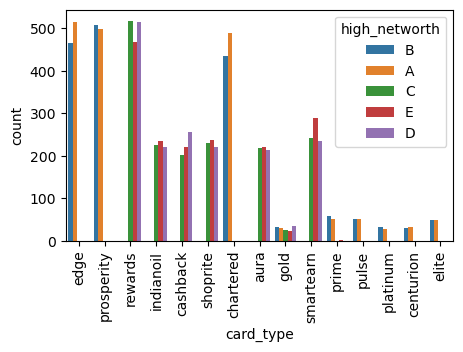

In [108]:
#check which cards using net worth wise using boxplot
plt.figure(figsize=(5,3))
sns.countplot(data=dg,x="card_type",hue="high_networth")
plt.xticks(rotation=90);

A,C,D using levels are approximately same. most numbers of reward cards are mostly using C,D,E (,middle,low worth) type customers. A type customers most using edge credit card, B type customers most using prosperity credit cards. less using platinum card only using A,B type customers.

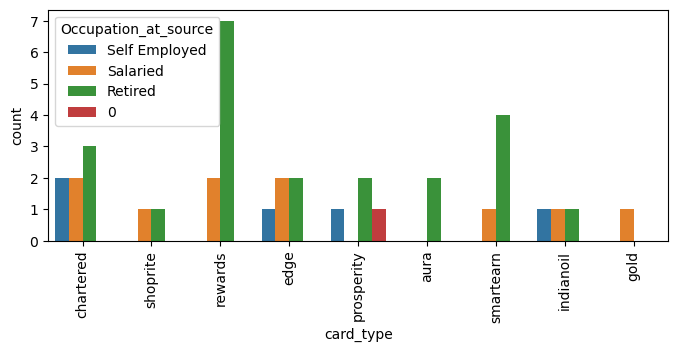

In [109]:
#check which type card have promblems with whose occupation
plt.figure(figsize=(8,3))
bx=dg[dg.hotlist_flag=="Y"]
sns.countplot(data=bx,x="card_type",hue="Occupation_at_source")
plt.xticks(rotation=90);

 rewards card using retried customers have high card problems.

<Axes: xlabel='Transactor_revolver', ylabel='cc_limit_log'>

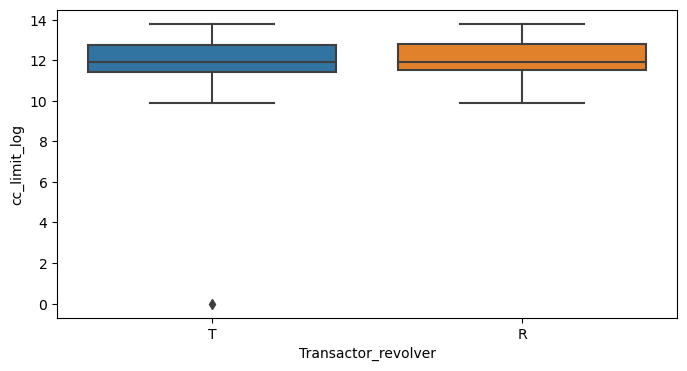

In [111]:
#check the cc limit of Revolver,Transactor using boxplot
plt.figure(figsize=(8,4))
sns.boxplot(data=dg,x="Transactor_revolver",y="cc_limit_log")

the cc limit is very low for both the transactor and revolver.
the median line of cc limit of the transactor and revolver are same.

<Axes: xlabel='high_networth', ylabel='cc_limit_log'>

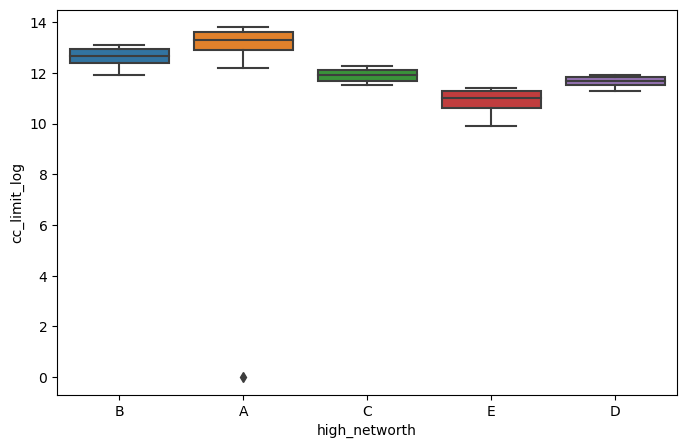

In [112]:
#check the cc limit of customer with worth  wise using boxplot
plt.figure(figsize=(8,5))
sns.boxplot(data=dg,x="high_networth",y="cc_limit_log")

high worth  type customers have high credit limit.
low worth customer type E have low credit limit.

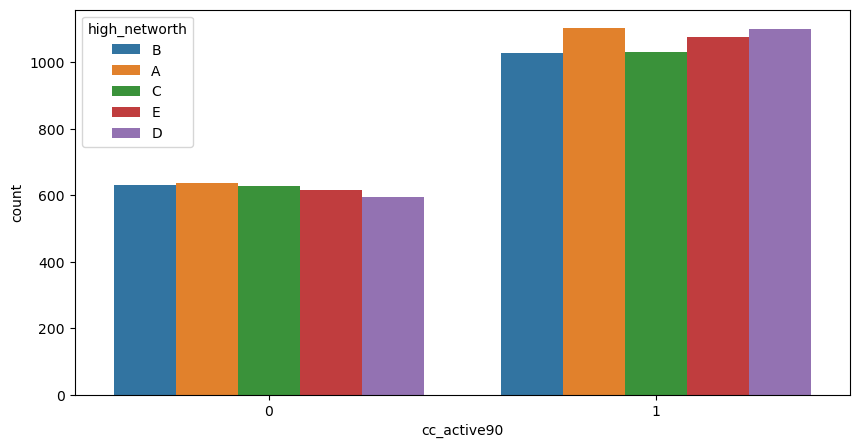

In [113]:
#check which cards using net worth wise using count plot
plt.figure(figsize=(10,5))
sns.countplot(data=dg,x="cc_active90",hue="high_networth");

more active A Type customers in last 90 days

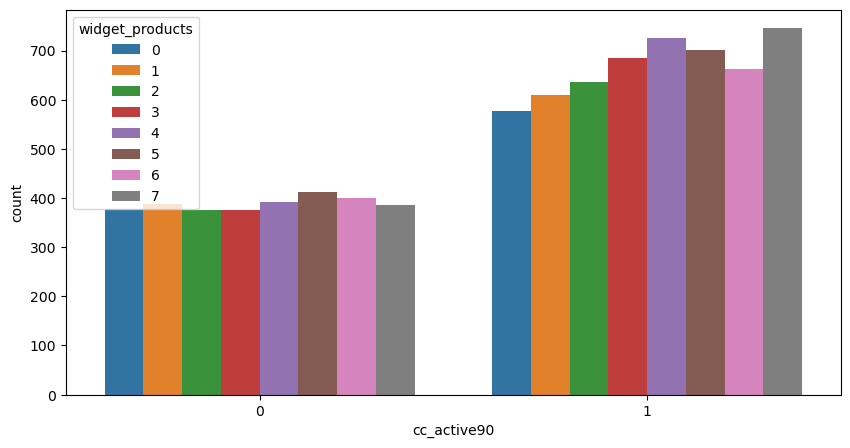

In [114]:
#check which cards using net worth wise using count plot
plt.figure(figsize=(10,5))
sns.countplot(data=dg,x="cc_active90",hue="widget_products");

all number of convenience products hold customers are active and inactive. more customers are active who have 7 products. inactive all are approximately the same.

<Axes: xlabel='engagement_products', ylabel='cc_limit_log'>

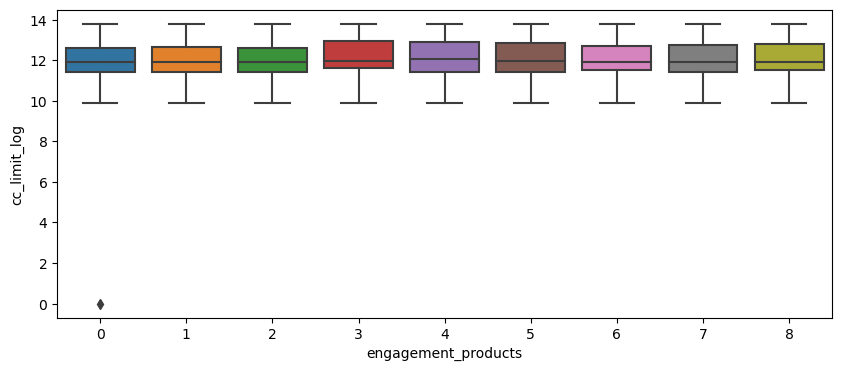

In [115]:
#check the cc limit of customers  no of engagement product wise using boxplot
plt.figure(figsize=(10,4))
sns.boxplot(data=dg,x="engagement_products",y="cc_limit_log")

slightly higher is 3,4 number of engagement products.customer who have loans,other investments their have less credit limit it will leads to card attrition 

<Axes: xlabel='avg_spends_l3m', ylabel='cc_limit_log'>

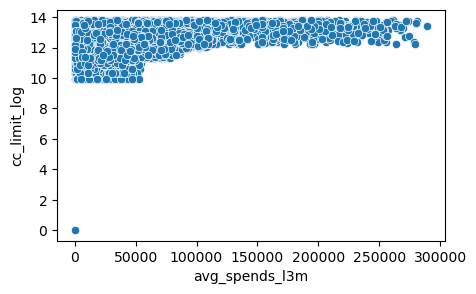

In [116]:
#credit limit and average spend using scatter plot
plt.figure(figsize=(5,3))
sns.scatterplot(data=dg,x="avg_spends_l3m",y="cc_limit_log")

average spends in last 3 months  is directly proportional to credit limit.

<Axes: xlabel='cc_active90', ylabel='cc_limit_log'>

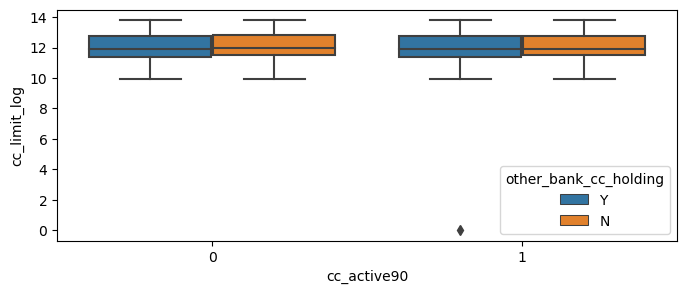

In [117]:
# check the credit limit of active in last 90 days using boxplot
plt.figure(figsize=(8,3))
sns.boxplot(data=dg,x="cc_active90",y="cc_limit_log",hue="other_bank_cc_holding")

credit limit of activity in the last 90 days of customer has or not other bank credit card are same.
the median line of inactive in last 90 days of customers having other bank credit cards is a little higher.

<Axes: xlabel='cc_limit_log', ylabel='annual_income_at_source_log'>

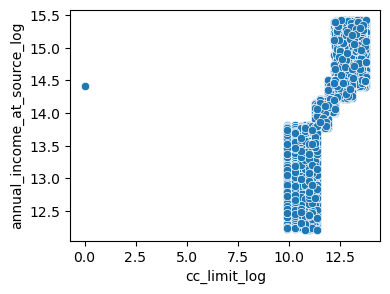

In [118]:
# check credit limit and annual income using scatter plot
plt.figure(figsize=(4,3))
sns.scatterplot(data=dg,x="cc_limit_log",y="annual_income_at_source_log")

the credit limit is positively correlated with annual income.this means credit limit dependent the annual income. 

<Axes: xlabel='Occupation_at_source', ylabel='cc_limit_log'>

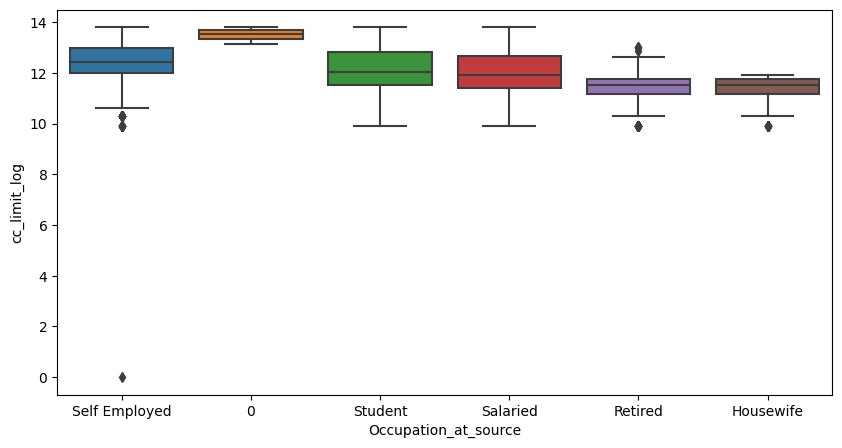

In [119]:
#check the cc limit of customers are active in last 90 days using boxplot
plt.figure(figsize=(10,5))
sns.boxplot(data=dg,x="Occupation_at_source",y="cc_limit_log")

most number of customers are salaried the credit limit of salaried persons are low.
the credit limit zero job(jobless) customers are very high compare to  other customers

<Axes: xlabel='Occupation_at_source', ylabel='annual_income_at_source_log'>

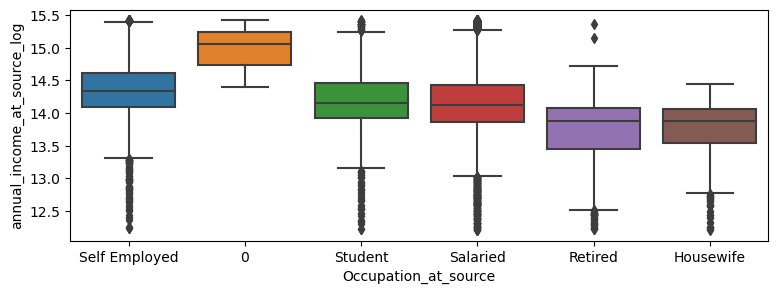

In [120]:
#check the cc limit of customers are active in last 90 days using boxpot
plt.figure(figsize=(9,3))
sns.boxplot(data=dg,x="Occupation_at_source",y="annual_income_at_source_log")

median line of annual income at source of jobless customer are high

<Axes: xlabel='Occupation_at_source', ylabel='count'>

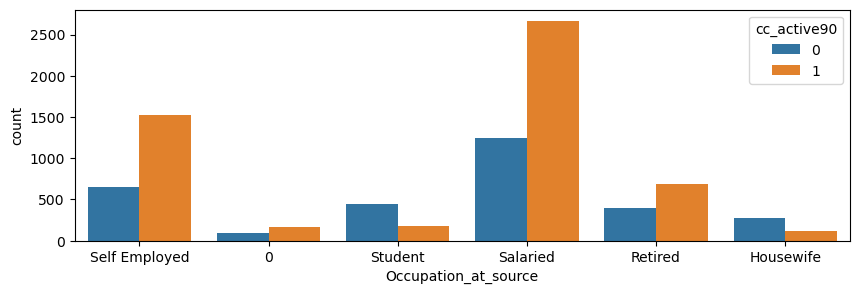

In [122]:
#check the cc limit of customers are active in last 90 days using bar plot
plt.figure(figsize=(10,3))
sns.countplot(data=dg,x="Occupation_at_source",hue="cc_active90")

salaried customers are more active and inactive in last 90 days.
less active customers are house wife.
less inactive is jobless customers

checking correlation so droping  cc limit log,income log,avg spend 3month log columns for effective for checking correlation

In [123]:
#droping  3 log columns that are cc limit log,income log,avg spend 3month log
dg.drop("annual_income_at_source_log",axis=1,inplace=True)
dg.drop("cc_limit_log",axis=1,inplace=True)
dg.drop("avg_spends_13m_log",axis=1,inplace=True)
dg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8448 entries, 0 to 8447
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   userid                   8448 non-null   int64         
 1   card_no                  8448 non-null   object        
 2   card_bin_no              8448 non-null   int64         
 3   Issuer                   8448 non-null   object        
 4   card_type                8448 non-null   object        
 5   card_source_date         8448 non-null   datetime64[ns]
 6   high_networth            8448 non-null   object        
 7   active_30                8448 non-null   int64         
 8   active_60                8448 non-null   int64         
 9   active_90                8448 non-null   int64         
 10  cc_active30              8448 non-null   int64         
 11  cc_active60              8448 non-null   int64         
 12  cc_active90              8448 non-

C:\Users\SABIR\AppData\Local\Temp\ipykernel_9988\303130989.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cr=dg.corr()


<Axes: >

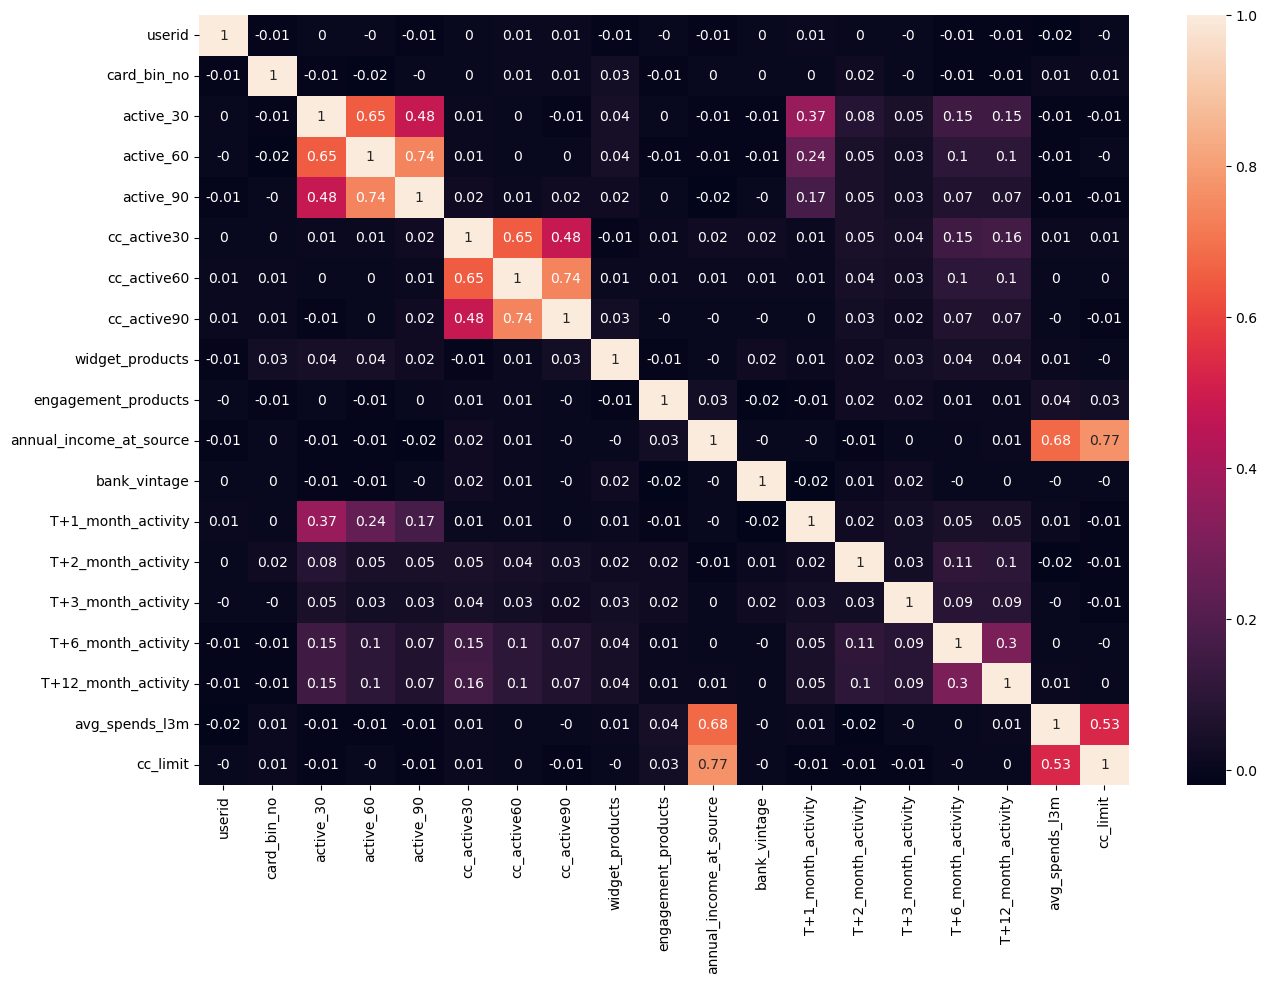

In [124]:
#find correlation and it put into cr variable ,round it for 2 values after the decimal point
cr=dg.corr()
round(cr,2)
# plot heat map 
plt.figure(figsize=(15,10))
sns.heatmap(round(cr,2),annot=True)


annual income and credit limit are highly correlated.
annual income and active in last 90 days are very negatively correlated.

### Insights

*Occupation and Credit Limits:
High numbers of customers are salaried, and most have low credit limits. To prevent card attrition, businesses can explore options to increase credit limits for these customers responsibly.

*Card Types and Rewards:
Visa is the dominant provider of credit cards and rewards cards. Consider diversifying card offerings and rewards programs to cater to a broader range of customer preferences.

*Engagement Products: 
Customers with loans and other investments tend to have lower credit limits. Provide additional incentives to these customers to prevent them from attriting.

*Usage Patterns Over Time:
Understanding that future credit card activity is decreasing over time (T+1 to T+2, T+3 to T+6, and T+6 to T+12) implies that customer engagement may drop as time progresses. Businesses should devise retention strategies for long-term customers.

*Income and Credit Limit:
Recognize that credit limits are positively correlated with annual income. Businesses should regularly review and adjust credit limits based on income changes to maintain customer satisfaction.

*Account Activity and Inactivity Trends:
most customers are active in last 90 days who have rewards visa type card type high worth ,salaried customers.more inactive customers are rewards type .least active and least inactive on platinum type cards.Business should focus on strategies to re-engage customers and prevent attrition.

*Balance Payoff:
Customers who pay off their balances in full every month are more common than those who carry balances. Consider providing incentives to the latter group to increase their engagement.

*Credit Card Usage: 
Most credit card users do not seem to have problems, which is a positive sign. However, it's essential to identify the factors contributing to customer satisfaction and replicate them across all customer segments.card card problems on very less customers.

*Number of Convenience Products and Investment/Loan Products: 
Customers with 7 convenience products appear to be the most active. Businesses should consider cross-selling or upselling additional products to customers to increase their engagement and overall satisfaction.

*Customer Segmentation: 
Understand which customer segments prefer specific card types (e.g., A-type customers with Edge cards). Tailor marketing and retention efforts accordingly

*Salaried Customers:
As most customers are salaried and have lower credit limits, businesses should monitor this segment closely and introduce measures to enhance their card usage and satisfaction.

*Customer Activity by Occupation:
Tailor engagement strategies to the specific needs and preferences of customers based on their occupations.

*Annual Income and Credit Limit:
Businesses can segment customers based on their income levels and offer credit limits that align with their financial capacity.

### list down the top 5 important variables, along with the business justifications

##### 1-card type
most customers are using visa type rewards cards.
###### Business Justification: 
The type of credit card (e.g., Visa, Mastercard) is crucial for understanding customer preferences and behavior. It can help in tailoring marketing strategies, offering relevant rewards, and assessing the popularity of different card types among customers.

##### 2-Occupation at Source:
most customers are Salaried 
###### Business Justification: 
Knowing the occupation of cardholders provides insights into the income levels and employment status of customers. This information is valuable for targeting specific customer segments, setting credit limits, and designing financial products that suit their needs.

##### 3-High Net Worth:
more type customers have  high worth
###### Business Justification: 
Identifying high-net-worth individuals (HNWIs) among cardholders is essential for offering personalized financial services, wealth management products, and investment opportunities. It can also influence credit decisions and risk assessment.

###### 4-Active 90 Days:
salaried,rewards  visa card  type  ,high worthed customers are more active in last 90 days
##### Business Justification: 
The variable indicating whether a cardholder has been active in the last 90 days is critical for assessing customer engagement and retention. It helps in identifying inactive customers who may need re-engagement strategies or account management interventions.

##### 5-Credit Limit:
credit limit of edge visa type,high worthed,salaried custoers have high credit limit,most customers are Transactor.
##### Business Justification:
The credit limit assigned to cardholders directly impacts their spending capacity and financial behavior. Monitoring credit limits is crucial for risk management, ensuring customers' ability to repay, and preventing overextension of credit.

##### Justifications
Segmentation and Targeted Marketing:

Justification: Segmentation allows the financial institution to understand the diverse needs and behaviors of cardholders. Targeted marketing ensures that promotional efforts are focused on individuals most likely to respond positively. This can lead to increased customer engagement and higher returns on marketing investments.

Product Customization:

Justification: Offering customized credit card products aligns with the principle of meeting customer needs effectively. It provides cardholders with options that match their preferences and lifestyle, increasing the likelihood of card usage and customer satisfaction.

Customer Engagement:

Justification: Engaging infrequent card users is essential for maximizing revenue and retaining customers. Encouraging them to use their cards more frequently through personalized offers can lead to increased transaction volumes and revenue for the institution.

Retention Strategies:

Justification: Retaining high-value customers is more cost-effective than acquiring new ones. Implementing retention strategies ensures that the institution doesn't lose its most valuable clients, thereby maintaining a stable revenue stream.

Risk Assessment:

Justification: Assessing risk associated with different card types and usage patterns is critical for prudent risk management. It helps the institution allocate resources effectively, monitor potentially risky accounts, and make informed decisions regarding credit limits and lending practices.

Market Expansion:

Justification: Expanding the product portfolio to cater to specific segments can open up new revenue streams. Targeting underserved markets, such as students or self-employed individuals, can help the institution tap into previously untapped customer segments.

Cross-Selling:

Justification: Cross-selling other financial products to existing cardholders can boost the institution's profitability and deepen customer relationships. It's often easier to sell additional services to customers who are already engaged with the institution.

Customer Support:

Justification: Providing dedicated customer support ensures that customers have a positive experience with the institution. It can lead to higher customer satisfaction, increased loyalty, and positive word-of-mouth referrals.

Compliance and Security:

Justification: Maintaining compliance with data protection regulations is not only a legal requirement but also crucial for building trust with customers. Data breaches or security lapses can lead to reputational damage and legal consequences.

Feedback Mechanism:

Justification: Gathering feedback directly from cardholders helps the institution understand customer preferences and pain points. This information is invaluable for making data-driven decisions and continuous improvement.

Education and Awareness:

Justification: Educating cardholders about their credit cards can lead to responsible card usage and increased customer satisfaction. Informed customers are less likely to make mistakes or misunderstand the features of their cards.
Partnerships and Alliances:

Justification: Strategic partnerships can provide additional value to cardholders, making the institution's cards more attractive. Collaborations with businesses that align with customer interests can drive card usage and loyalty.
Fraud Prevention:

Justification: Robust fraud prevention measures protect both customers and the institution. Preventing fraud helps maintain trust with customers and minimizes financial losses due to fraudulent activities.

Credit Limit Adjustments:

Justification: Periodically reviewing and adjusting credit limits based on customer behavior and financial status helps mitigate credit risk. It prevents overextension of credit and reduces the likelihood of defaults.